## 09. PyTorch Model Deployment

- https://github.com/mrdbourke/pytorch-deep-learning/blob/main/09_pytorch_model_deployment.ipynb

we're going to deploy our FoodVision Mini model to the internet as a usable app!

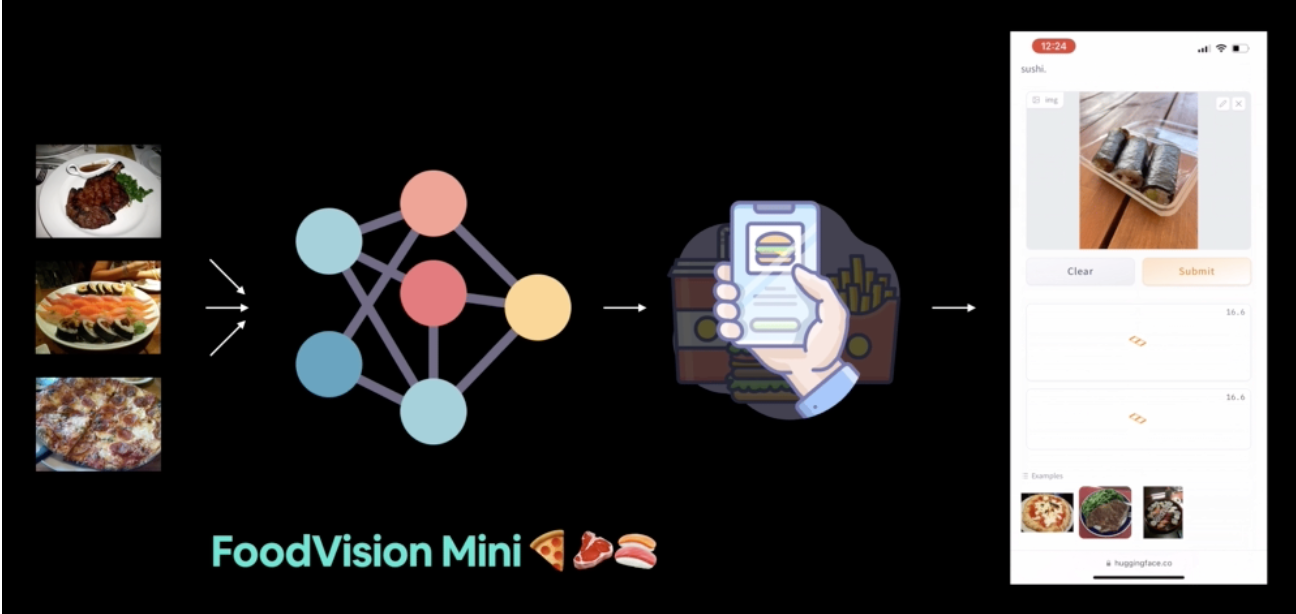

### Different types of machine learning model deployment

머신 러닝 모델 배포의 다양한 유형에 대해 책 한 권을 쓸 수도 있습니다(PyTorch 추가 리소스에 좋은 책이 많이 나와 있습니다).  

그리고 이 분야는 여전히 발전하고 있습니다.  

하지만 저는 질문부터 시작하고 싶습니다:  

"머신 러닝 모델을 사용하기에 가장 이상적인 시나리오는 무엇일까?"라는 질문으로 시작합니다.  

그런 다음 거기서부터 거꾸로 작업합니다.  

물론 미리 알 수 없을 수도 있습니다.  
하지만 여러분은 그런 것들을 상상할 수 있을 만큼 똑똑합니다.   

푸드비전 미니의 경우 이상적인 시나리오는 다음과 같습니다:

- 누군가 모바일 기기(앱 또는 웹 브라우저를 통해)에서 사진을 찍습니다.
- 예측 결과가 빠르게 나옵니다.
간단합니다.

따라서 두 가지 주요 기준이 있습니다:

1. 모델이 모바일 장치에서 작동해야 합니다(즉, 컴퓨팅 제약이 있을 수 있습니다).  
2. 모델이 예측을 빠르게 수행해야 합니다(느린 앱은 지루한 앱이므로).  
물론 사용 사례에 따라 요구 사항이 다를 수 있습니다.

위의 두 가지 요점을 다른 두 가지 질문으로 세분화할 수 있습니다:

1. 어디로 갈 것인가? - 즉, 어디에 저장할 것인가?  
2. 어떻게 작동할 것인가? - 즉, 예측 결과를 즉시 반환하나요? 아니면 나중에 제공되나요?  

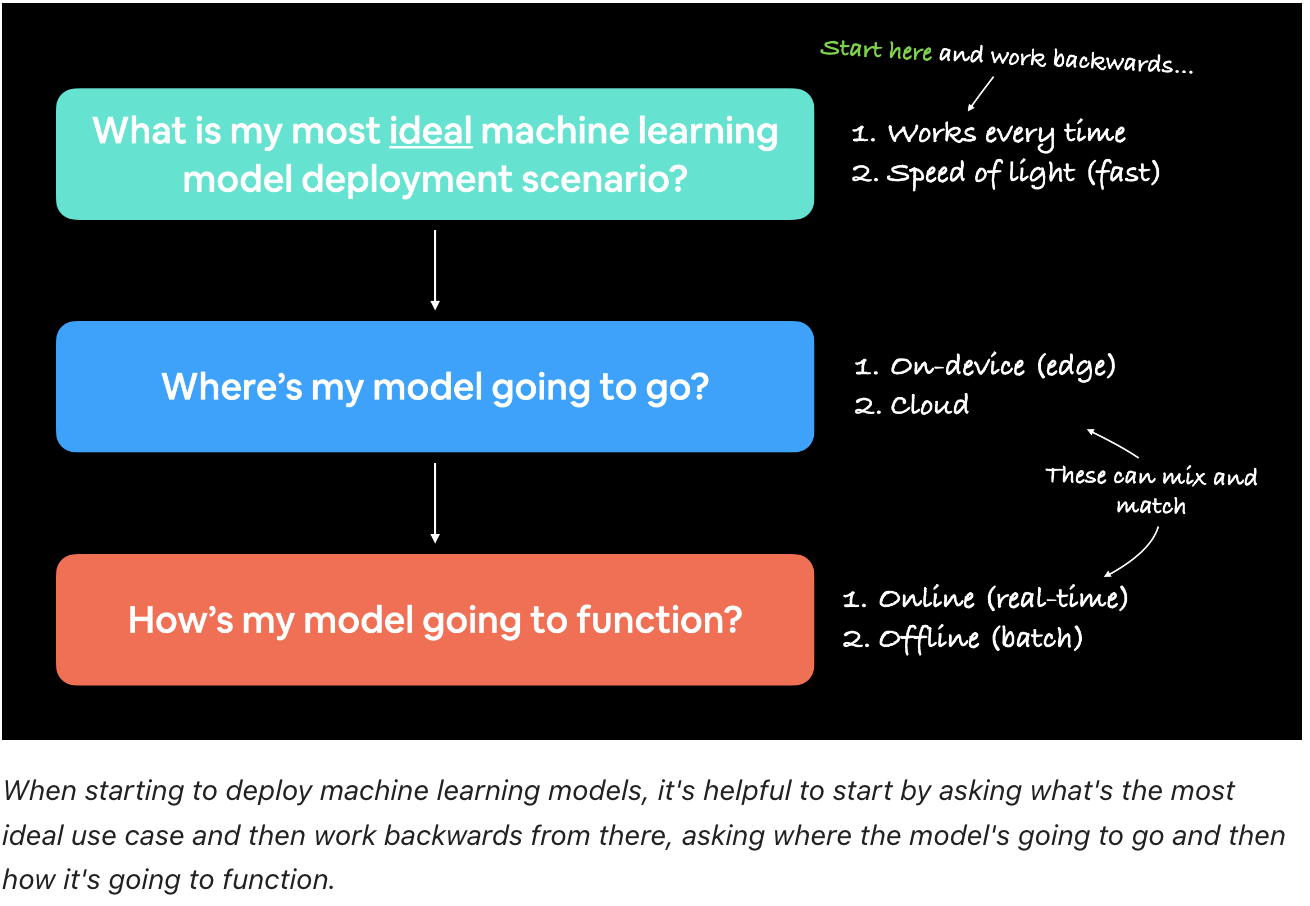

Where's it going to go?


머신 러닝 모델을 배포할 때 어디에 위치하나요?

일반적으로 온디바이스(엣지/브라우저 내라고도 함) 또는 클라우드(누군가/무엇이 모델을 호출하는 실제 디바이스가 아닌 컴퓨터/서버)가 주요 논쟁거리입니다.

둘 다 장단점이 있습니다.

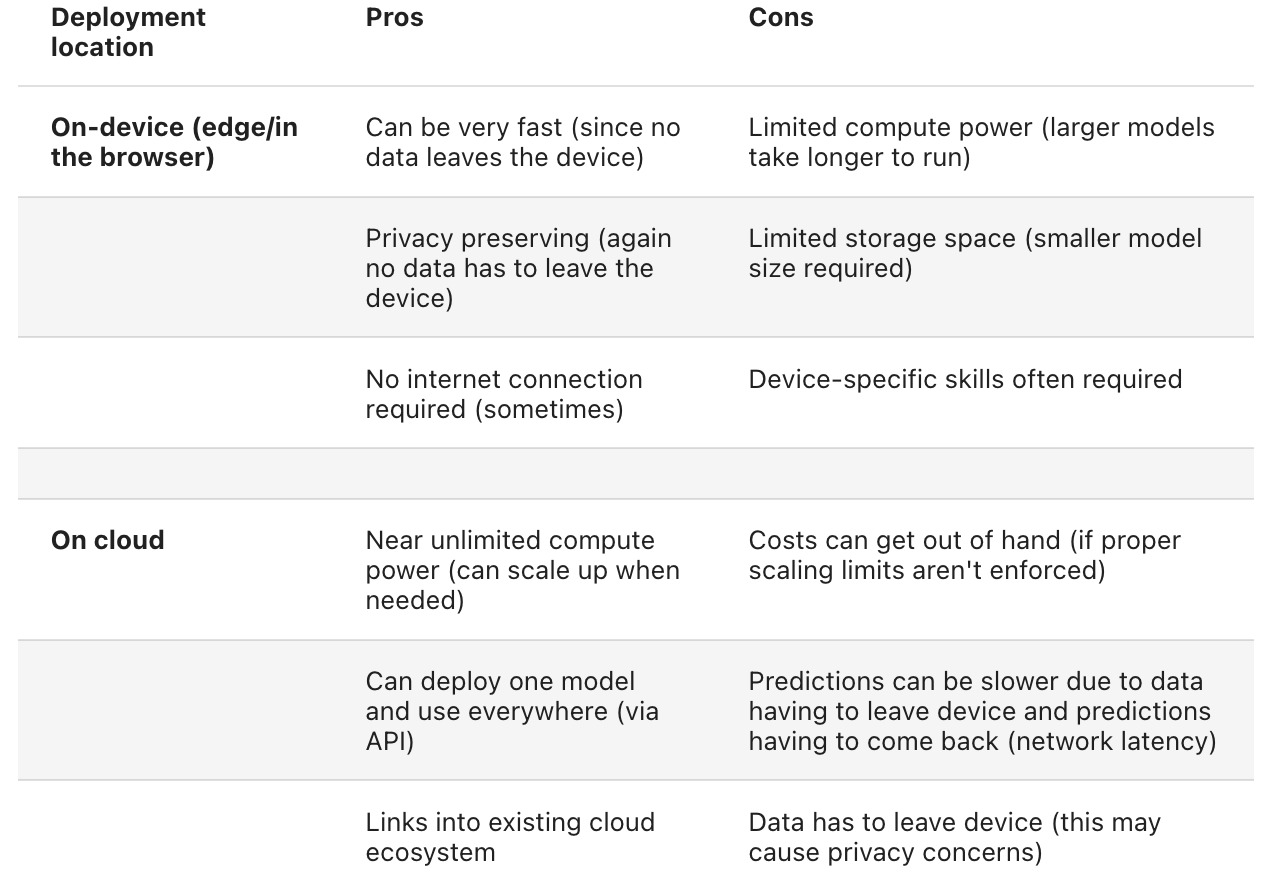

더 자세한 내용은 추가 커리큘럼에 리소스를 남겨 두었으니 참고하시기 바랍니다.  

예를 들어 보겠습니다.  

FoodVision Mini를 앱으로 배포하는 경우 성능이 우수하고 빠르기를 원합니다.  

그렇다면 어떤 모델을 선호할까요?  

- 예측당 1초의 추론 시간(지연 시간)으로 95%의 정확도로 작동하는 온디바이스 모델.
- 예측당 10초의 추론 시간으로 98%의 정확도로 작동하는 클라우드 모델(더 크고 더 나은 모델이지만 계산하는 데 더 오래 걸림).
이 수치는 제가 만들어낸 것이지만, 온디바이스와 클라우드의 잠재적인 차이를 보여줍니다.  

옵션 1은 모바일 디바이스에 적합하기 때문에 더 작고 성능이 낮지만 빠르게 실행되는 모델일 수 있습니다.  

옵션 2는 더 많은 컴퓨팅과 스토리지가 필요한 더 큰 고성능 모델일 수 있지만, 디바이스에서 데이터를 전송하고 다시 가져와야 하기 때문에 실행 시간이 조금 더 오래 걸립니다(따라서 실제 예측은 빠를지라도 네트워크 시간과 데이터 전송을 고려해야 합니다).  

FoodVision Mini의 경우, 성능의 작은 타격이 빠른 추론 속도보다 훨씬 크기 때문에 옵션 1을 선호할 것입니다.  

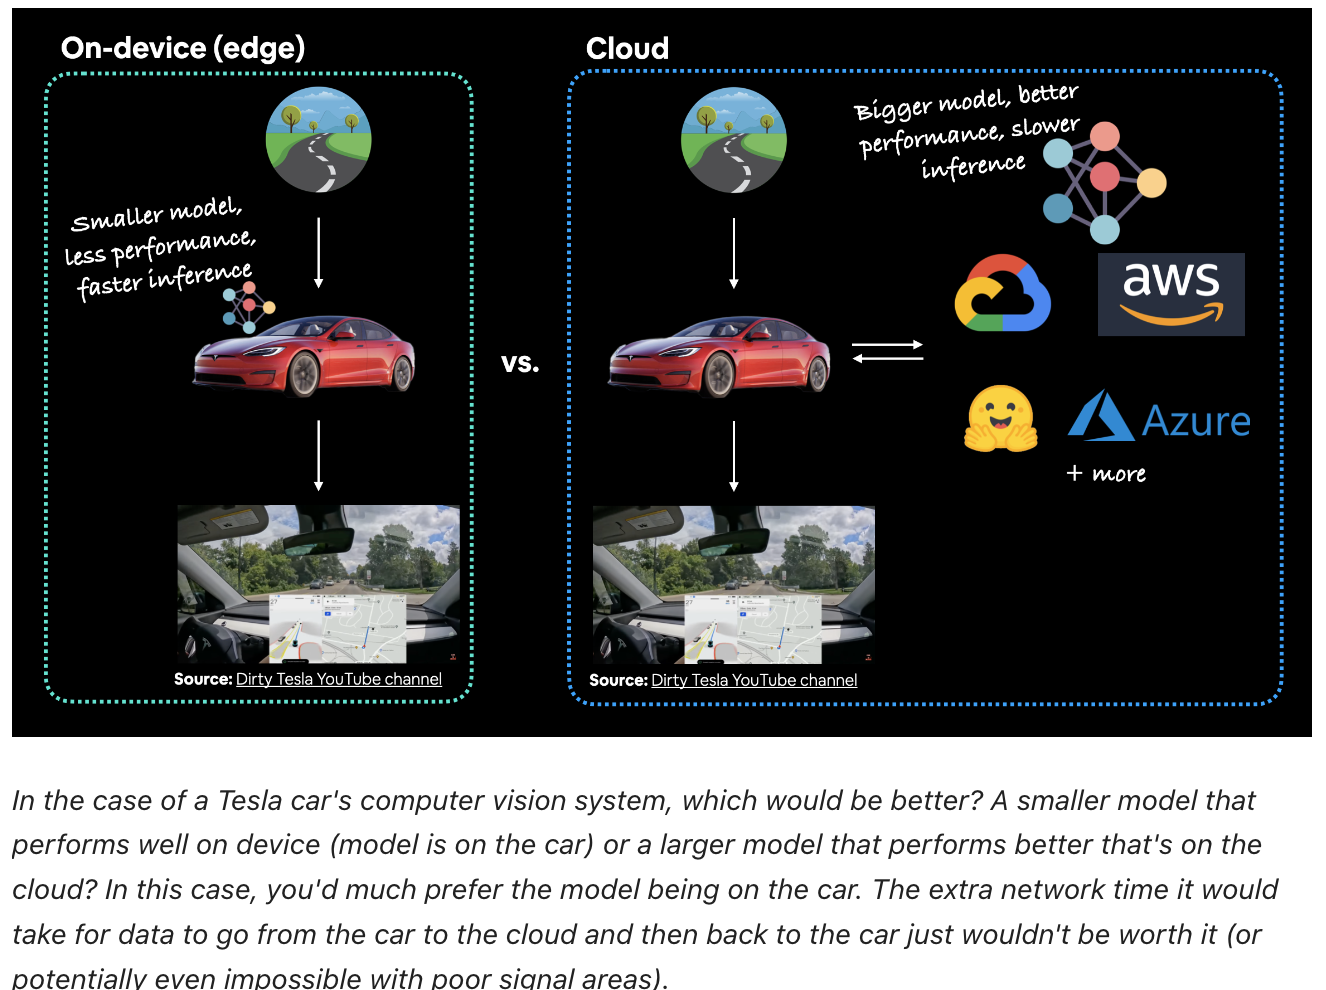

How's it going to function?

머신 러닝 모델을 배포할 때 어떻게 작동해야 할까요?

즉, 예측 결과를 즉시 리턴하길 원하시나요?
아니면 나중에 해도 괜찮을까요?

이 두 가지 시나리오를 일반적으로 다음과 같이 부릅니다:

- 온라인(실시간) : 예측/추론이 즉시 이루어집니다. 예를 들어, 누군가 이미지를 업로드하면 이미지가 변형되어 예측이 반환되거나, 누군가 구매를 하면 모델이 해당 거래가 이상 거래가 아닌 것으로 확인하여 구매가 진행됩니다.
- 오프라인(배치) : 예측/추론이 주기적으로 발생합니다. 예를 들어, 사진 애플리케이션은 모바일 디바이스가 충전되어 있는 동안 이미지를 다양한 카테고리(예: 해변, 식사 시간, 가족, 친구)로 분류합니다.

참고: "배치"는 한 번에 여러 샘플에 대해 추론이 수행되는 것을 의미합니다. 그러나 약간의 혼란을 더하기 위해 배치 처리는 즉시/온라인(여러 이미지를 한 번에 분류) 및/또는 오프라인(여러 이미지를 한 번에 예측/학습)으로 수행될 수 있습니다

각각의 주요 차이점은 예측이 즉시 또는 주기적으로 수행된다는 점입니다.  

주기적으로도 몇 초마다부터 몇 시간 또는 며칠마다까지 다양한 시간 척도를 가질 수 있습니다.  

그리고 이 두 가지를 혼합하여 사용할 수도 있습니다.  

FoodVision Mini의 경우, 추론 파이프라인이 온라인(실시간)으로 이루어지므로 누군가 피자, 스테이크, 스시 이미지를 업로드하면 예측 결과가 즉시 반환됩니다(실시간보다 느리면 지루한 경험이 될 수 있습니다).

그러나 학습 파이프라인의 경우, 이전 챕터에서 수행했던 것처럼 일괄 처리(오프라인) 방식으로 진행해도 괜찮습니다.  

Ways to deploy a machine learning model

머신 러닝 모델을 배포하기 위한 몇 가지 옵션(온디바이스 및 클라우드)에 대해 설명했습니다.  

그리고 각각의 옵션에는 고유한 요구 사항이 있습니다:

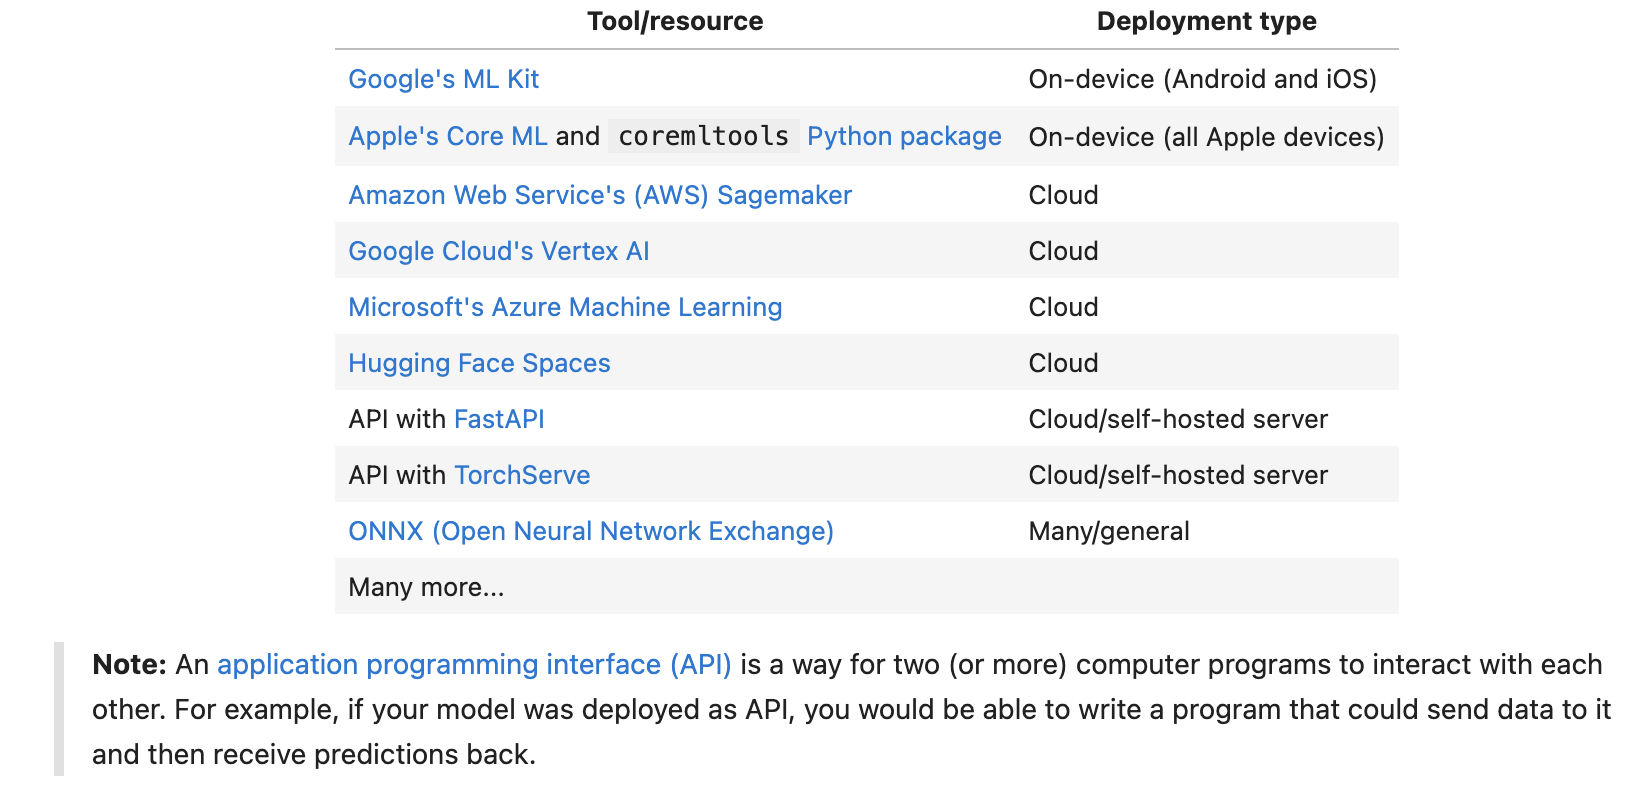

어떤 옵션을 선택하느냐는 무엇을 만들고 누구와 함께 작업하느냐에 따라 크게 달라집니다.

하지만 옵션이 너무 많으면 매우 부담스러울 수 있습니다.

따라서 작게 시작하여 단순하게 유지하는 것이 가장 좋습니다.

가장 좋은 방법 중 하나는 Gradio를 사용하여 머신 러닝 모델을 데모 앱으로 전환한 다음 Hugging Face Spaces에 배포하는 것입니다.

나중에 푸드비전 미니를 통해 바로 그렇게 할 것입니다.

### What we're going to cover

머신 러닝 모델 배포에 대한 이야기는 충분합니다.  

이제 머신 러닝 엔지니어가 되어 실제로 배포해 보겠습니다.  

우리의 목표는 다음과 같은 메트릭을 사용하여 데모 Gradio 앱을 통해 FoodVision 모델을 배포하는 것입니다:  

1. 성능: 95% 이상의 정확도.  
2. 속도: 30FPS 이상의 실시간 추론(각 예측의 지연 시간은 ~0.03초 미만).  

지금까지 가장 우수한 두 모델을 비교하기 위해 실험을 실행하는 것으로 시작하겠습니다: EffNetB2와 ViT 특징 추출기입니다.  

그런 다음 목표 지표에 가장 근접한 성능을 보이는 모델을 배포할 것입니다.  

마지막으로 깜짝 보너스로 마무리하겠습니다.  

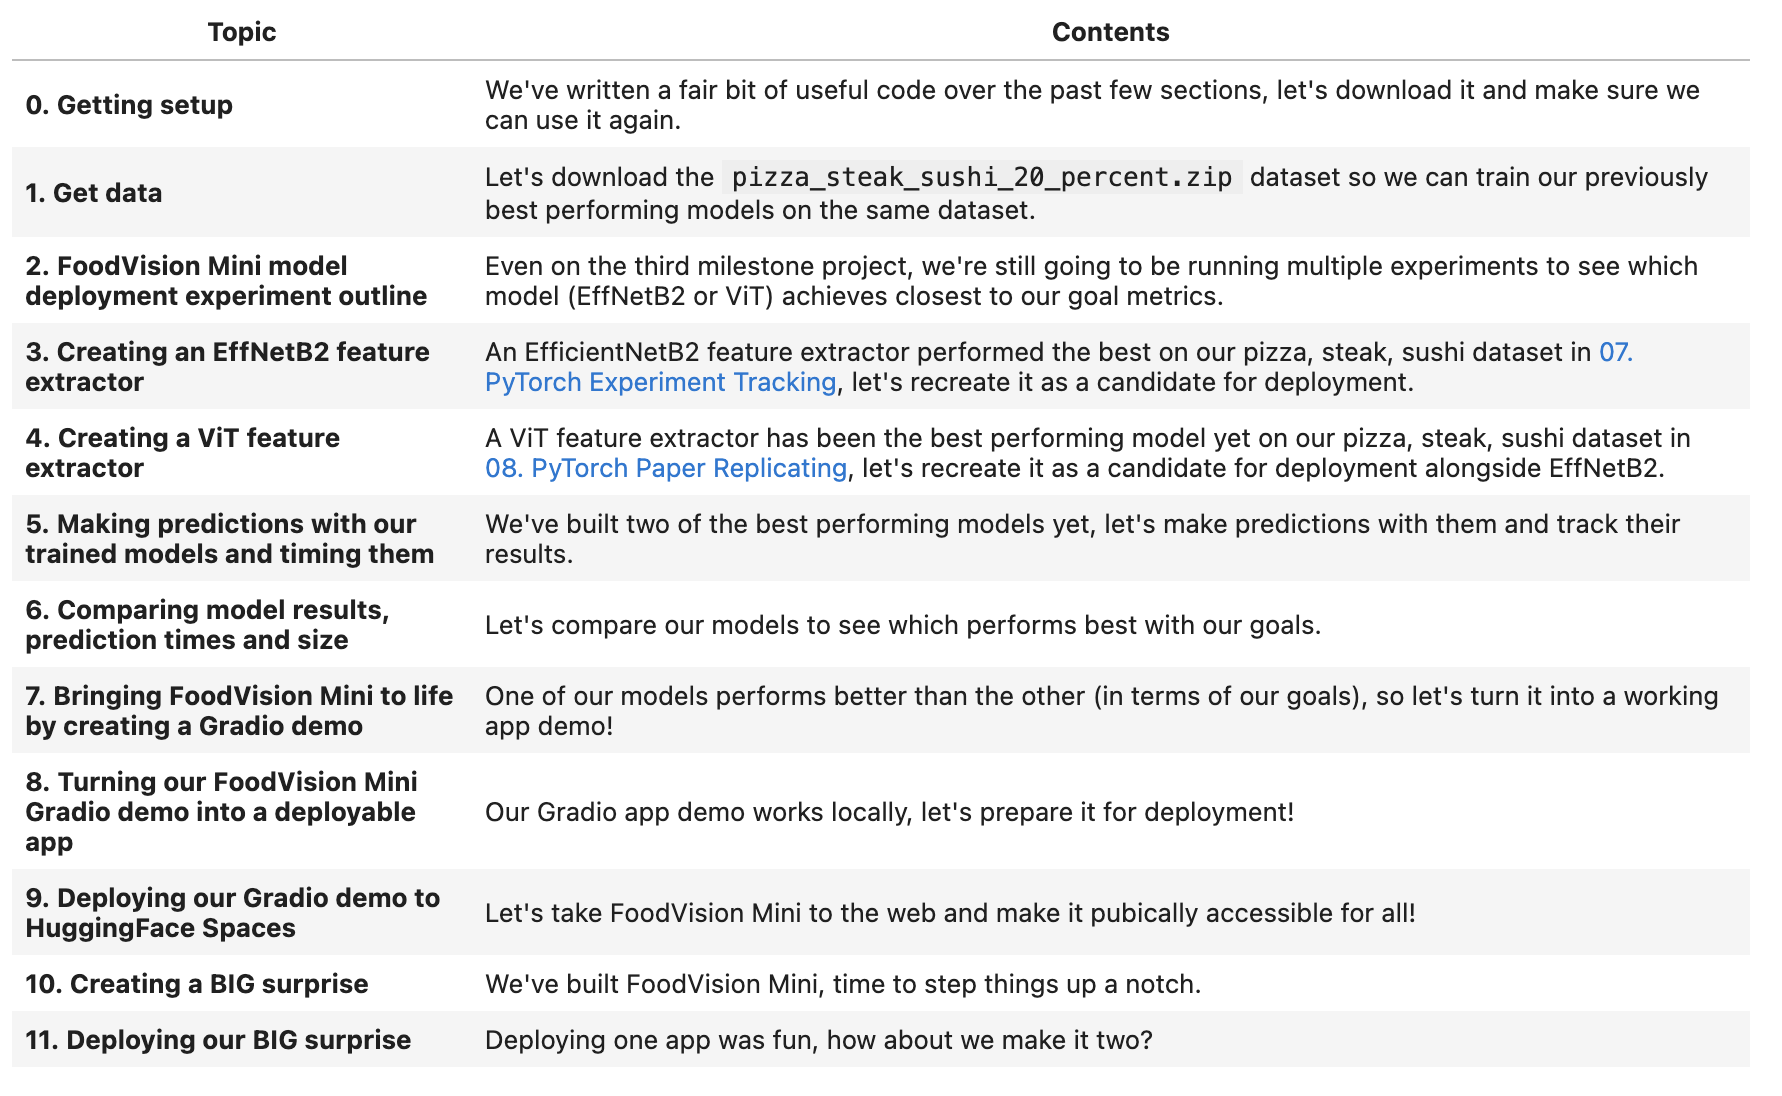

### 0. Getting setup

이전에 했던 것처럼 이 섹션에 필요한 모든 모듈이 준비되었는지 확인하겠습니다.

05년에 만든 Python 스크립트(예: data_setup.py 및 engine.py)를 가져올 것입니다. 파이토치 모듈화.

이를 위해 파이토치 딥러닝 리포지토리에서 going_modular 디렉터리를 다운로드합니다(아직 다운로드하지 않은 경우).

또한 사용할 수 없는 경우 torchinfo 패키지도 다운로드합니다.

나중에 모델을 시각적으로 표현하는 데 도움이 될 것입니다.

그리고 나중에는 토치비전 v0.13 패키지(2022년 7월부터 사용 가능)를 사용할 예정이므로 최신 버전을 확보할 수 있도록 할 것입니다.

In [1]:
# For this notebook to run with updated APIs, we need torch 1.12+ and torchvision 0.13+
try:
    import torch
    import torchvision
    assert int(torch.__version__.split(".")[1]) >= 12, "torch version should be 1.12+"
    assert int(torchvision.__version__.split(".")[1]) >= 13, "torchvision version should be 0.13+"
    print(f"torch version: {torch.__version__}")
    print(f"torchvision version: {torchvision.__version__}")
except:
    print(f"[INFO] torch/torchvision versions not as required, installing nightly versions.")
    !pip3 install -U torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/cu113
    import torch
    import torchvision
    print(f"torch version: {torch.__version__}")
    print(f"torchvision version: {torchvision.__version__}")

[INFO] torch/torchvision versions not as required, installing nightly versions.
Looking in indexes: https://pypi.org/simple, https://download.pytorch.org/whl/cu113
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.6/59.6 MB 9.6 MB/s eta 0:00:0000:0100:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 9.3 MB/s eta 0:00:0000:0100:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 9.3 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: torch
    Found existing installation: torch 2.1.0
    Uninstalling torch-2.1.0:
      Successfully uninstalled torch-2.1.0
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.16.0
    Uninstalling torchvision-0.16.0:
      Successfully uninstalled torchvision-0.16.0
  Attempting uninstall: torchaudio
    Found existing installation: torchaudio 2.1.0
    Uninstalling torchaudio-2.1.0:
      Successfully uninstalled torchaudio-2.1.0
torch version: 2.1.0
torchvision version: 0.16.0


In [2]:
import matplotlib.pyplot as plt
import torch
import torchvision

from torch import nn
from torchvision import transforms

from torchinfo import summary

from going_modular import data_setup, engine
from helper_functions import download_data, set_seeds, plot_loss_curves

/Users/sguys99/anaconda3/envs/torch/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

### 1. Getting data

우리의 목표는 FoodVision Mini 문제에 가장 적합한 모델을 배포하는 것이므로, 
먼저 20%의 피자, 스테이크, 스시 데이터 세트를 다운로드하여 
EffNetB2 피처 추출기와 ViT 특징 추출기를 훈련한 다음 두 모델을 비교해 보겠습니다.

이렇게 하면 사과와 사과를 비교하게 됩니다(한 데이터 세트에서 학습된 모델과 동일한 데이터 세트에서 학습된 다른 모델을 비교).

참고: 다운로드하는 데이터 세트는 전체 Food101 데이터 세트(각각 1,000개의 이미지가 포함된 101개의 음식 클래스)의 샘플입니다. 구체적으로 20%는 피자, 스테이크, 스시 클래스에서 무작위로 선택된 이미지의 20%를 의미합니다. 이 데이터 세트가 어떻게 생성되었는지는 extras/04_custom_data_creation.ipynb에서 확인할 수 있으며, 자세한 내용은 04에서 확인할 수 있습니다. PyTorch 사용자 정의 데이터 세트 섹션 1을 참조하세요.

In [4]:
# Download pizza, steak, sushi images from GitHub
data_20_percent_path = download_data(source="https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi_20_percent.zip",
                                     destination="pizza_steak_sushi_20_percent")

data_20_percent_path

[INFO] data/pizza_steak_sushi_20_percent directory exists, skipping download.


PosixPath('data/pizza_steak_sushi_20_percent')

In [5]:
train_dir = data_20_percent_path / "train"
test_dir = data_20_percent_path / "test"

### 2. FoodVision Mini model deployment experiment outline

가장 이상적으로 배포된 모델인 FoodVision Mini는 성능이 우수하고 빠릅니다.  

우리는 모델이 가능한 한 실시간에 가깝게 작동하기를 원합니다.  

이 경우 실시간이란 사람의 눈이 볼 수 있는 속도와 비슷하기 때문에 ~30FPS(초당 프레임 수)를 의미합니다(이에 대한 논쟁이 있지만 ~30FPS를 벤치마크로 사용하기로 하겠습니다).  

그리고 피자, 스테이크, 초밥의 세 가지 클래스를 분류할 때 95% 이상의 정확도로 작동하는 모델을 원합니다.  

물론 정확도가 높으면 좋겠지만 그렇게 되면 속도가 저하될 수 있습니다.  

그래서 우리의 목표는 다음과 같습니다:  

- 성능 - 95% 이상의 정확도로 작동하는 모델.
- 속도 - ~30FPS(이미지당 0.03초의 추론 시간, 지연 시간이라고도 함)로 이미지를 분류할 수 있는 모델.

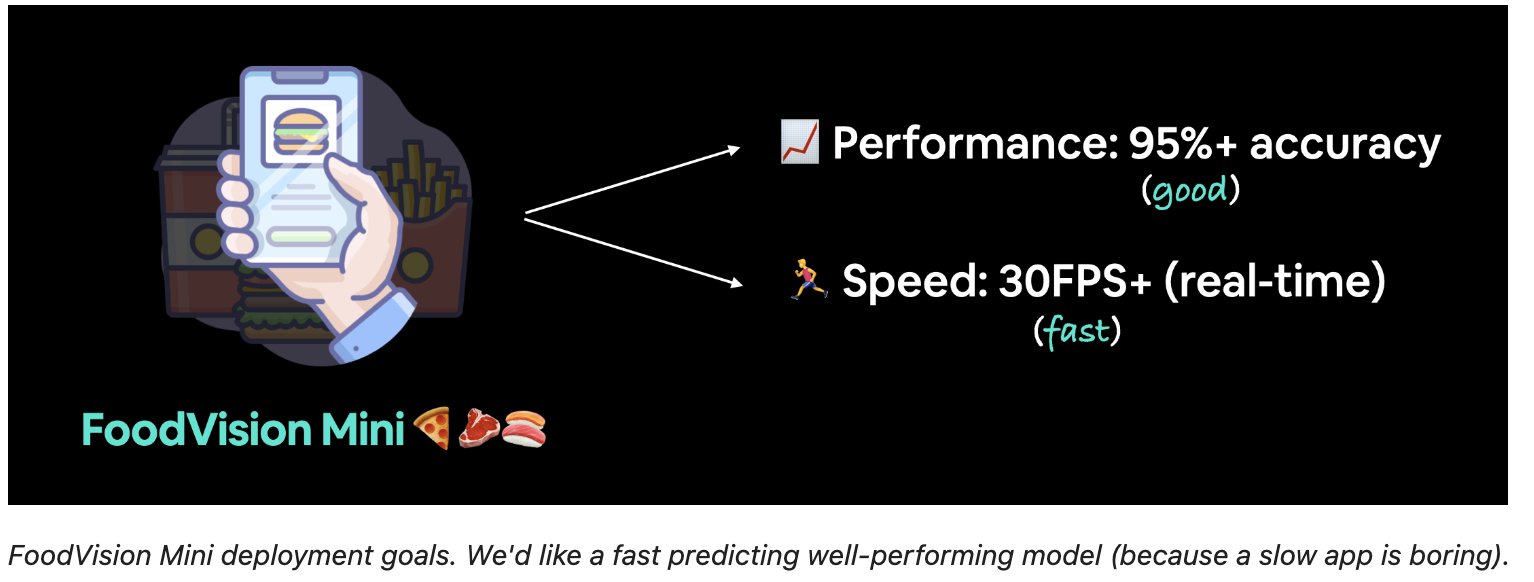

여기서는 속도에 중점을 두겠습니다.   
즉, 10FPS에서 95% 이상의 정확도를 보이는 모델보다 ~30FPS에서 90% 이상의 정확도를 보이는 모델을 선호합니다.

이러한 결과를 얻기 위해 이전 섹션에서 가장 성능이 좋은 모델을 가져와 보겠습니다:

- EffNetB2 특징 추출기(줄여서 EffNetB2)입니다.- 07에서 만든것. 분류기 레이어가 조정된 torchvision.models.efficientnet_b2()를 사용한 PyTorch 실험 추적 섹션 7.5.
- ViT-B/16 특징 추출기(줄여서 ViT) - 08에서 만들어졌습니다. PyTorch 논문 섹션 10을 조정된 헤드 레이어와 함께 torchvision.models.vit_b_16()을 사용하여 복제합니다.  
참고 ViT-B/16은 "비전 트랜스포머 베이스, 패치 크기 16"의 약자입니다.

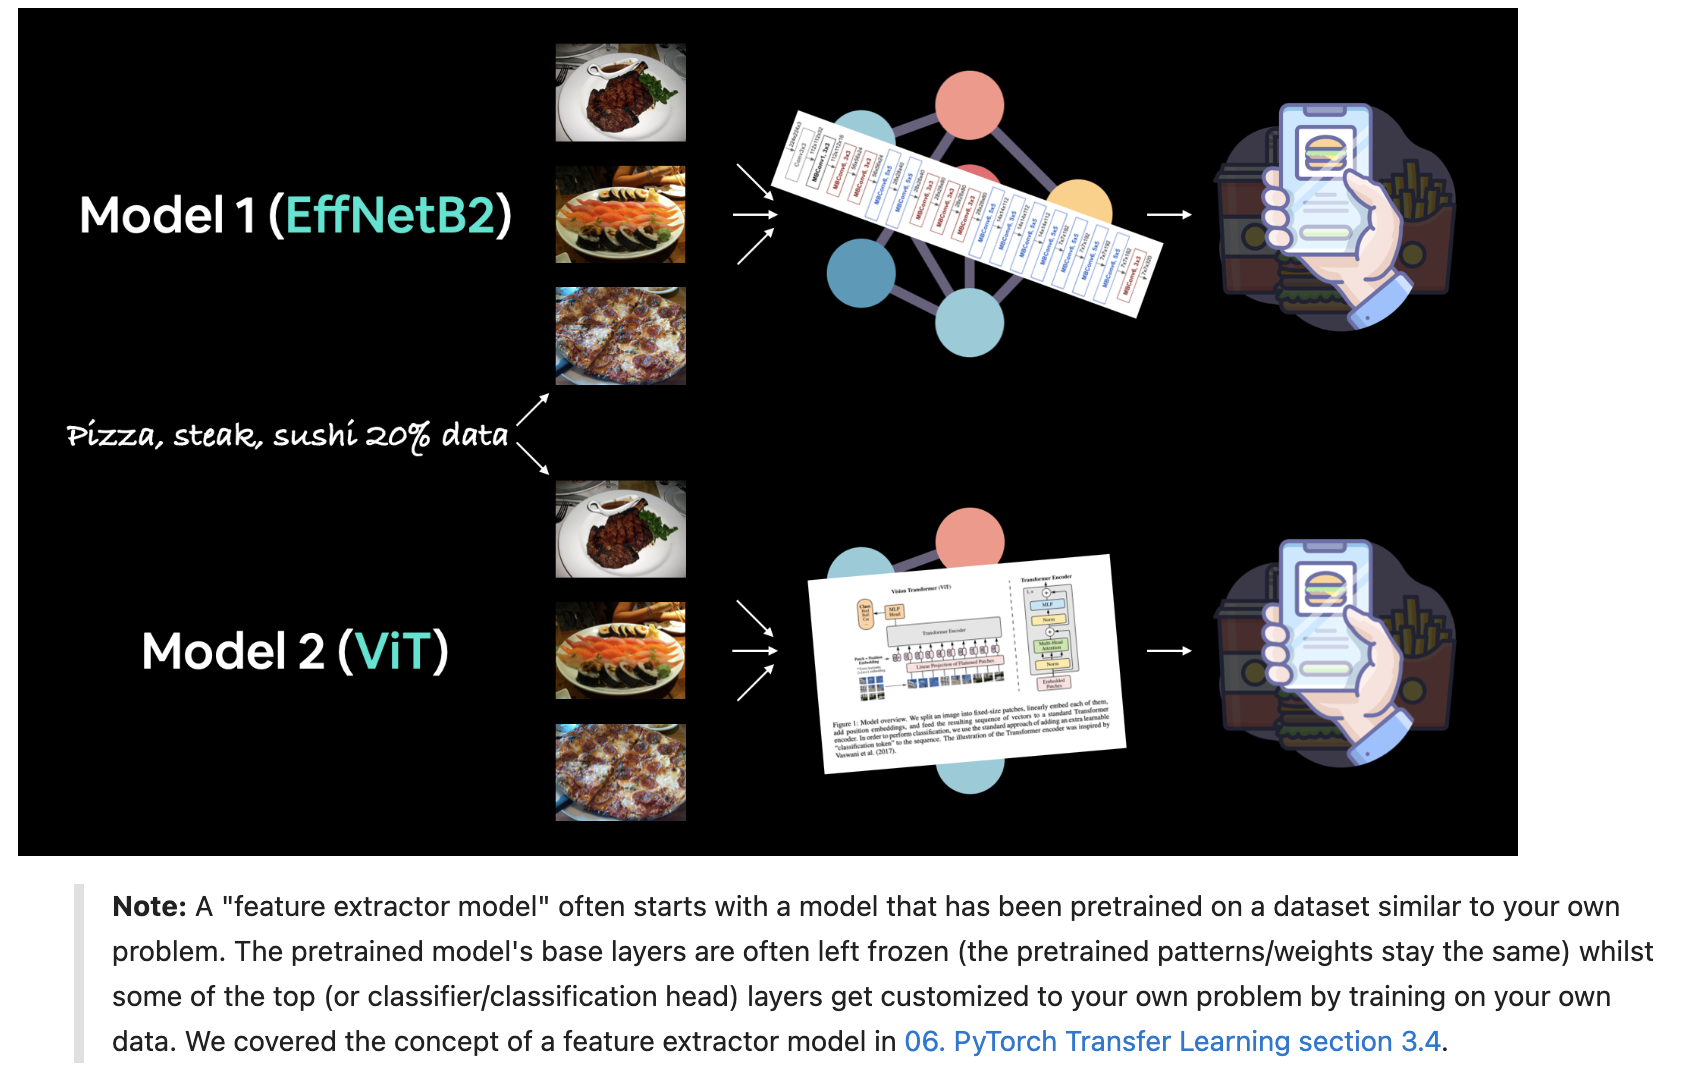

### 3. Creating an EffNetB2 feature extractor

저희는 07년에 EffNetB2 특징 추출기 모델을 처음 만들었습니다. PyTorch 실험 추적 섹션 7.5.  

이 섹션이 끝날 무렵에는 매우 우수한 성능을 보였습니다.  

이제 동일한 데이터로 훈련된 ViT 특징 추출기와 그 결과를 비교할 수 있도록 여기에서 다시 만들어 보겠습니다.  

그렇게 하려면 다음과 같이 하세요:  

1) 사전 학습된 가중치를 weights=torchvision.models.EfficientNet_B2_Weights.DEFAULT로 설정합니다. 여기서 "DEFAULT"는 "현재 사용 가능한 최상의 값"을 의미합니다(또는 weights="DEFAULT"를 사용할 수 있음).

2) transforms() 메서드를 사용하여 가중치에서 사전 학습된 모델 이미지 트랜스폼을 가져옵니다(사전 학습된 EffNetB2가 학습된 것과 동일한 형식으로 이미지를 변환할 수 있도록 하기 위해 필요합니다).

3) 가중치를 torchvision.models.efficientnet_b2 인스턴스에 전달하여 사전 훈련된 모델 인스턴스를 생성합니다.

4) 모델의 기본 레이어를 고정합니다.

5) 자체 데이터에 맞게 분류기 헤드를 업데이트합니다.

In [6]:
# 1. pretrained EffNetB2 가중치 사용
effnetb2_weights = torchvision.models.EfficientNet_B2_Weights.DEFAULT

# 2. Get EffNetB2 transforms
effnetb2_transforms = effnetb2_weights.transforms()

# 3. Setup pretrained model
effnetb2 = torchvision.models.efficientnet_b2(weights=effnetb2_weights)

# 4. Freeze the base layers in the model
for param in effnetb2.parameters():
    param.requires_grad = False

In [7]:
effnetb2.classifier

Sequential(
  (0): Dropout(p=0.3, inplace=True)
  (1): Linear(in_features=1408, out_features=1000, bias=True)
)

훌륭합니다! 
우리 문제에 맞게 분류기 헤드를 변경하려면 out_features 변수를 가지고 있는 클래스 수와 동일한 수로 바꾸어 보겠습니다
(이 경우, 피자, 스테이크, 초밥에 대해 각각 하나씩, out_features=3).

참고: 출력 레이어/분류기 헤드를 변경하는 이 프로세스는 작업 중인 문제에 따라 달라집니다.  
예를 들어, 다른 개수의 출력이나 다른 종류의 출력을 원한다면 그에 따라 출력 레이어를 변경해야 합니다.

In [8]:
# 5. Update the classifier head
effnetb2.classifier = nn.Sequential(
    nn.Dropout(p= 0.3, inplace=True),
    nn.Linear(in_features=1408,
              out_features = 3)
)

3.1 Creating a function to make an EffNetB2 feature extractor

EffNetB2 특징 추출기를 사용할 준비가 된 것 같지만, 여기에는 꽤 많은 단계가 포함되어 있으므로 위의 코드를 나중에 재사용할 수 있는 함수로 바꾸는 것은 어떨까요?  

이 함수를 create_effnetb2_model()이라고 부르고 재현성을 위해 사용자 정의 가능한 클래스 수와 임의의 시드 매개변수를 사용할 것입니다.  

이 함수는 연관된 트랜스폼과 함께 EffNetB2 특징 추출기를 반환하는 것이 이상적입니다.  

In [9]:
def create_effnetb2_model(num_classes:int=3, 
                          seed:int=42):
    """Creates an EfficientNetB2 feature extractor model and transforms.

    Args:
        num_classes (int, optional): number of classes in the classifier head. 
            Defaults to 3.
        seed (int, optional): random seed value. Defaults to 42.

    Returns:
        model (torch.nn.Module): EffNetB2 feature extractor model. 
        transforms (torchvision.transforms): EffNetB2 image transforms.
    """
    # 1, 2, 3. Create EffNetB2 pretrained weights, transforms and model
    weights = torchvision.models.EfficientNet_B2_Weights.DEFAULT
    transforms = weights.transforms()
    model = torchvision.models.efficientnet_b2(weights=weights)

    # 4. Freeze all layers in base model
    for param in model.parameters():
        param.requires_grad = False

    # 5. Change classifier head with random seed for reproducibility
    torch.manual_seed(seed)
    model.classifier = nn.Sequential(
        nn.Dropout(p=0.3, inplace=True),
        nn.Linear(in_features=1408, out_features=num_classes),
    )
    
    return model, transforms

In [10]:
effnetb2, effnetb2_transforms = create_effnetb2_model(num_classes=3,
                                                      seed=42)

In [11]:
from torchinfo import summary

# Print EffNetB2 model summary (uncomment for full output) 
summary(effnetb2, 
        input_size=(1, 3, 224, 224),
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"])

Layer (type (var_name))                                      Input Shape          Output Shape         Param #              Trainable
EfficientNet (EfficientNet)                                  [1, 3, 224, 224]     [1, 3]               --                   Partial
├─Sequential (features)                                      [1, 3, 224, 224]     [1, 1408, 7, 7]      --                   False
│    └─Conv2dNormActivation (0)                              [1, 3, 224, 224]     [1, 32, 112, 112]    --                   False
│    │    └─Conv2d (0)                                       [1, 3, 224, 224]     [1, 32, 112, 112]    (864)                False
│    │    └─BatchNorm2d (1)                                  [1, 32, 112, 112]    [1, 32, 112, 112]    (64)                 False
│    │    └─SiLU (2)                                         [1, 32, 112, 112]    [1, 32, 112, 112]    --                   --
│    └─Sequential (1)                                        [1, 32, 112, 112]    [1, 1

3.2 Creating DataLoaders for EffNetB2

EffNetB2 특징 추출기가 준비되었으니 이제 데이터로더를 만들 차례입니다.  

05에서 만든 data_setup.create_dataloaders() 함수를 사용하여 이를 수행할 수 있습니다.  

배치 크기 32를 사용하고 effnetb2_transforms를 사용하여 이미지를 변환하여 effnetb2 모델이 학습된 것과 동일한 형식이 되도록 하겠습니다.

In [12]:
from going_modular import data_setup

train_dataloader_effnet2, test_dataloader_effnetb2, class_names = data_setup.create_dataloaders(
train_dir=train_dir,
test_dir=test_dir,
transform=effnetb2_transforms,
batch_size=32
)

3.3 Training EffNetB2 feature extractor

In [13]:
from going_modular import engine

optimizer = torch.optim.Adam(params = effnetb2.parameters(),
                             lr = 1e-3
                             )

loss_fn = torch.nn.CrossEntropyLoss()


device = 'mps'

set_seeds()
effnetb2_results = engine.train(
    model = effnetb2,
    train_dataloader=train_dataloader_effnet2,
    test_dataloader=test_dataloader_effnetb2,
    epochs = 10,
    optimizer=optimizer,
    loss_fn=loss_fn,
    device=device
)

 10%|█         | 1/10 [00:13<02:05, 13.92s/it]

Epoch: 1 | train_loss: 0.9817 | train_acc: 0.5729 | test_loss: 0.7343 | test_acc: 0.9625


 20%|██        | 2/10 [00:18<01:08,  8.50s/it]

Epoch: 2 | train_loss: 0.7070 | train_acc: 0.8667 | test_loss: 0.5739 | test_acc: 0.9500


 30%|███       | 3/10 [00:23<00:47,  6.84s/it]

Epoch: 3 | train_loss: 0.6039 | train_acc: 0.8167 | test_loss: 0.4819 | test_acc: 0.9625


 40%|████      | 4/10 [00:28<00:36,  6.01s/it]

Epoch: 4 | train_loss: 0.4490 | train_acc: 0.9021 | test_loss: 0.4318 | test_acc: 0.9375


 50%|█████     | 5/10 [00:33<00:27,  5.57s/it]

Epoch: 5 | train_loss: 0.4287 | train_acc: 0.9104 | test_loss: 0.3894 | test_acc: 0.9472


 60%|██████    | 6/10 [00:37<00:21,  5.26s/it]

Epoch: 6 | train_loss: 0.4202 | train_acc: 0.8833 | test_loss: 0.3528 | test_acc: 0.9688


 70%|███████   | 7/10 [00:42<00:15,  5.08s/it]

Epoch: 7 | train_loss: 0.4224 | train_acc: 0.8396 | test_loss: 0.3256 | test_acc: 0.9472


 80%|████████  | 8/10 [00:47<00:09,  4.98s/it]

Epoch: 8 | train_loss: 0.3951 | train_acc: 0.8875 | test_loss: 0.3461 | test_acc: 0.9472


 90%|█████████ | 9/10 [00:51<00:04,  4.92s/it]

Epoch: 9 | train_loss: 0.3832 | train_acc: 0.8771 | test_loss: 0.3104 | test_acc: 0.9347


100%|██████████| 10/10 [00:56<00:00,  5.68s/it]

Epoch: 10 | train_loss: 0.3655 | train_acc: 0.8604 | test_loss: 0.2837 | test_acc: 0.9625


3.4 Inspecting EffNetB2 loss curves

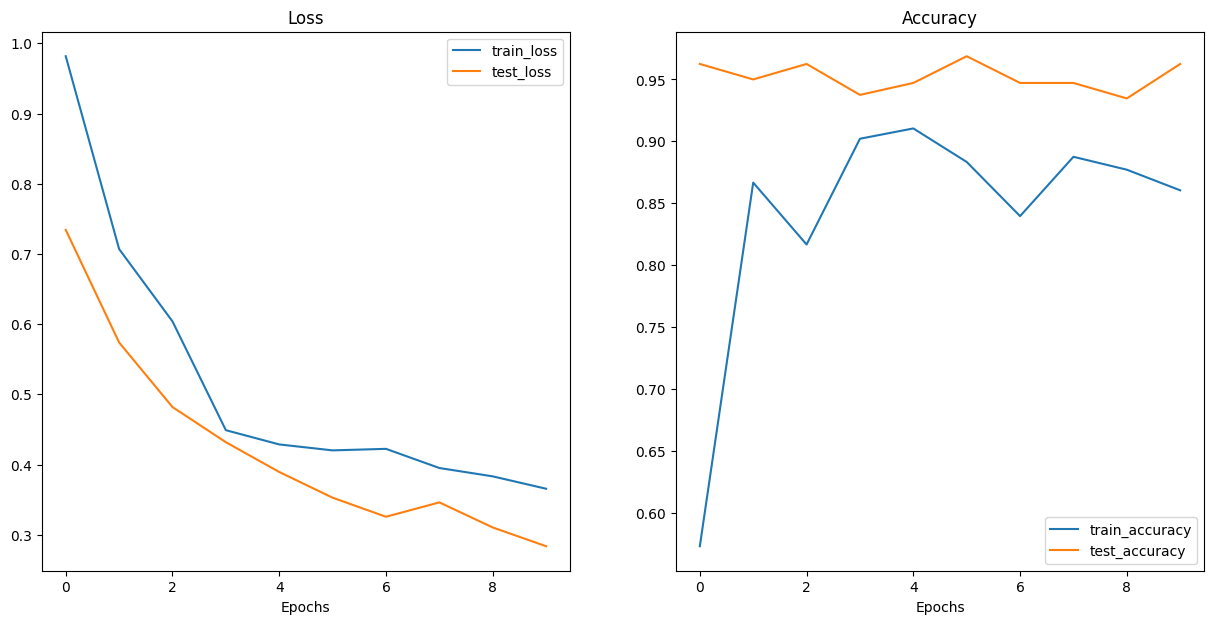

In [14]:
from helper_functions import plot_loss_curves

plot_loss_curves(effnetb2_results)

3.5 Saving EffNetB2 feature extractor

In [15]:
from going_modular import utils

# Save the model
utils.save_model(model=effnetb2,
                 target_dir="models",
                 model_name="09_pretrained_effnetb2_feature_extractor_pizza_steak_sushi_20_percent.pth")

[INFO] Saving model to: models/09_pretrained_effnetb2_feature_extractor_pizza_steak_sushi_20_percent.pth


3.6 Checking the size of EffNetB2 feature extractor

FoodVision Mini를 구동하기 위해 모델을 배포하는 기준 중 하나는 속도(~30FPS 이상)이므로 모델의 크기를 확인해 보겠습니다.

왜 크기를 확인하나요?

항상 그런 것은 아니지만, 모델의 크기가 추론 속도에 영향을 미칠 수 있습니다.

즉, 모델에 더 많은 매개 변수가 있으면 일반적으로 더 많은 연산을 수행하며 이러한 각 연산에는 약간의 컴퓨팅 성능이 필요합니다.

또한 컴퓨팅 성능이 제한된 기기(예: 모바일 기기 또는 웹 브라우저)에서 모델이 작동하기를 원하기 때문에 일반적으로 크기가 작을수록 좋습니다(정확도 측면에서 여전히 성능이 우수하다면).

모델의 크기를 바이트 단위로 확인하려면 Python의 pathlib.Path.stat("path_to_model").st_size를 사용하여 (1024*1024)로 나누어 대략적으로 메가바이트로 변환할 수 있습니다.

In [16]:
from pathlib import Path

# Get the model size in bytes then convert to megabytes
pretrained_effnetb2_model_size = Path("models/09_pretrained_effnetb2_feature_extractor_pizza_steak_sushi_20_percent.pth").stat().st_size // (1024*1024) # division converts bytes to megabytes (roughly) 
print(f"Pretrained EffNetB2 feature extractor model size: {pretrained_effnetb2_model_size} MB")

Pretrained EffNetB2 feature extractor model size: 29 MB


3.7 Collecting EffNetB2 feature extractor stats

테스트 손실, 테스트 정확도, 모델 크기 등 EffNetB2 특징 추출기 모델에 대한 몇 가지 통계가 있는데,  
이를 모두 딕셔너리으로 수집하여 곧 출시될 ViT 특징 추출기와 비교해 보는 것은 어떨까요?

그리고 재미삼아 파라미터의 총 개수를 하나 더 계산해 보겠습니다.

effnetb2.parameters()에서 요소(또는 패턴/가중치)의 수를 세어 계산할 수 있습니다. 각 파라미터의 요소 수에 액세스하려면 torch.numel()("number of elements"의 줄임말) 메서드를 사용하겠습니다.

In [17]:
effnetb2_total_params = sum(torch.numel(param) for param in effnetb2.parameters())
effnetb2_total_params

7705221

이제 관련 정보를 딕셔너리로 저장하자.

In [18]:
# Create a dictionary with EffNetB2 statistics
effnetb2_stats = {"test_loss": effnetb2_results["test_loss"][-1],
                  "test_acc": effnetb2_results["test_acc"][-1],
                  "number_of_parameters": effnetb2_total_params,
                  "model_size (MB)": pretrained_effnetb2_model_size}
effnetb2_stats

{'test_loss': 0.2836607813835144,
 'test_acc': 0.9625,
 'number_of_parameters': 7705221,
 'model_size (MB)': 29}

- 성능이 95% 정도 된다.

### 4. Creating a ViT feature extractor

이제 FoodVision Mini 모델링 실험을 계속할 시간입니다.

이번에는 ViT 특징 추출기를 만들어 보겠습니다.

이번에는 torchvision.models.efficientnet_b2() 대신 torchvision.models.vit_b_16()을 사용한다는 점을 제외하고는 EffNetB2 특징 추출기와 거의 동일한 방식으로 수행합니다.  

create_vit_model()이라는 함수를 생성하는 것으로 시작하겠습니다. 이 함수는 create_effnetb2_model()과 매우 유사하지만 EffNetB2가 아닌 ViT 특징 추출기 모델과 트랜스폼을 반환한다는 점을 제외하면 매우 유사합니다.  

또 다른 약간의 차이점은 torchvision.models.vit_b_16()의 출력 레이어가 분류기가 아닌 헤드라는 점입니다.

In [19]:
vit = torchvision.models.vit_b_16()
vit.heads

Sequential(
  (head): Linear(in_features=768, out_features=1000, bias=True)
)

In [20]:
def create_vit_model(num_classes:int=3, 
                     seed:int=42):
    """Creates a ViT-B/16 feature extractor model and transforms.

    Args:
        num_classes (int, optional): number of target classes. Defaults to 3.
        seed (int, optional): random seed value for output layer. Defaults to 42.

    Returns:
        model (torch.nn.Module): ViT-B/16 feature extractor model. 
        transforms (torchvision.transforms): ViT-B/16 image transforms.
    """
    
    weights = torchvision.models.ViT_B_16_Weights.DEFAULT
    transforms = weights.transforms()
    model = torchvision.models.vit_b_16(weights=weights)
    
    for param in model.parameters():
        param.requires_grad = False
        
    torch.manual_seed(seed)
    model.heads = nn.Sequential(nn.Linear(in_features=768,
                                          out_features = num_classes))
    
    return model, transforms

In [21]:
# Create ViT model and transforms
vit, vit_transforms = create_vit_model(num_classes=3,
                                       seed=42)

In [22]:
from torchinfo import summary

# Print ViT feature extractor model summary (uncomment for full output)
summary(vit, 
        input_size=(1, 3, 224, 224),
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"])

Layer (type (var_name))                                      Input Shape          Output Shape         Param #              Trainable
VisionTransformer (VisionTransformer)                        [1, 3, 224, 224]     [1, 3]               768                  Partial
├─Conv2d (conv_proj)                                         [1, 3, 224, 224]     [1, 768, 14, 14]     (590,592)            False
├─Encoder (encoder)                                          [1, 197, 768]        [1, 197, 768]        151,296              False
│    └─Dropout (dropout)                                     [1, 197, 768]        [1, 197, 768]        --                   --
│    └─Sequential (layers)                                   [1, 197, 768]        [1, 197, 768]        --                   False
│    │    └─EncoderBlock (encoder_layer_0)                   [1, 197, 768]        [1, 197, 768]        (7,087,872)          False
│    │    └─EncoderBlock (encoder_layer_1)                   [1, 197, 768]        [1, 1

EffNetB2 특징 추출기 모델과 마찬가지로 ViT 모델의 기본 레이어는 고정되어 있고 출력 레이어는 필요에 따라 사용자 정의할 수 있습니다!

하지만 큰 차이가 느껴지시나요?

ViT 모델에는 EffNetB2 모델보다 훨씬 더 많은 파라미터가 있습니다. 나중에 속도와 성능 측면에서 두 모델을 비교할 때 이 점이 중요하게 작용할 것입니다.

4.1 Create DataLoaders for ViT

ViT 모델이 준비되었으니 이제 이를 위한 데이터로더를 만들어 보겠습니다.

이 작업은 EffNetB2에서 했던 것과 동일한 방식으로 진행하되, vit_transforms를 사용하여 이미지를 ViT 모델이 학습된 것과 동일한 형식으로 변환할 것입니다.

In [23]:
# Setup ViT DataLoaders
from going_modular import data_setup
train_dataloader_vit, test_dataloader_vit, class_names = data_setup.create_dataloaders(train_dir=train_dir,
                                                                                       test_dir=test_dir,
                                                                                       transform=vit_transforms,
                                                                                       batch_size=32)

4.2 Training ViT feature extractor

엔진.train() 함수를 사용하여 10개의 에포크에 대해 ViT 특징 추출기 모델을 훈련하고, 최적화 함수로 torch.optim.Adam(), 학습률 1e-3, 손실 함수로 torch.nn.CrossEntropyLoss()를 사용해 보겠습니다.

훈련 전에 set_seeds() 함수를 사용하여 가능한 한 재현 가능한 결과를 얻으려고 노력할 것입니다.

In [24]:
from going_modular import engine

In [25]:
optimizer = torch.optim.Adam(params=vit.parameters(), lr = 1e-3)
loss_fn = torch.nn.CrossEntropyLoss()

set_seeds()

In [26]:
vit_results = engine.train(model=vit,
                           train_dataloader=train_dataloader_vit,
                           test_dataloader=test_dataloader_vit,
                           epochs=10,
                           optimizer=optimizer,
                           loss_fn=loss_fn,
                           device=device)

  0%|          | 0/10 [00:00<?, ?it/s]

 10%|█         | 1/10 [00:09<01:26,  9.64s/it]

Epoch: 1 | train_loss: 0.7020 | train_acc: 0.7521 | test_loss: 0.2714 | test_acc: 0.9381


 20%|██        | 2/10 [00:17<01:07,  8.41s/it]

Epoch: 2 | train_loss: 0.2532 | train_acc: 0.9062 | test_loss: 0.1672 | test_acc: 0.9602


 30%|███       | 3/10 [00:24<00:56,  8.06s/it]

Epoch: 3 | train_loss: 0.1764 | train_acc: 0.9542 | test_loss: 0.1273 | test_acc: 0.9693


 40%|████      | 4/10 [00:32<00:46,  7.82s/it]

Epoch: 4 | train_loss: 0.1276 | train_acc: 0.9625 | test_loss: 0.1074 | test_acc: 0.9722


 50%|█████     | 5/10 [00:39<00:38,  7.72s/it]

Epoch: 5 | train_loss: 0.1159 | train_acc: 0.9646 | test_loss: 0.0953 | test_acc: 0.9784


 60%|██████    | 6/10 [00:47<00:31,  7.77s/it]

Epoch: 6 | train_loss: 0.1274 | train_acc: 0.9375 | test_loss: 0.0832 | test_acc: 0.9722


 70%|███████   | 7/10 [00:55<00:23,  7.82s/it]

Epoch: 7 | train_loss: 0.0897 | train_acc: 0.9771 | test_loss: 0.0845 | test_acc: 0.9784


 80%|████████  | 8/10 [01:03<00:15,  7.81s/it]

Epoch: 8 | train_loss: 0.0919 | train_acc: 0.9812 | test_loss: 0.0764 | test_acc: 0.9722


 90%|█████████ | 9/10 [01:11<00:07,  7.82s/it]

Epoch: 9 | train_loss: 0.0922 | train_acc: 0.9792 | test_loss: 0.0734 | test_acc: 0.9784


100%|██████████| 10/10 [01:19<00:00,  7.90s/it]

Epoch: 10 | train_loss: 0.0658 | train_acc: 0.9833 | test_loss: 0.0644 | test_acc: 0.9847


4.3 Inspecting ViT loss curves

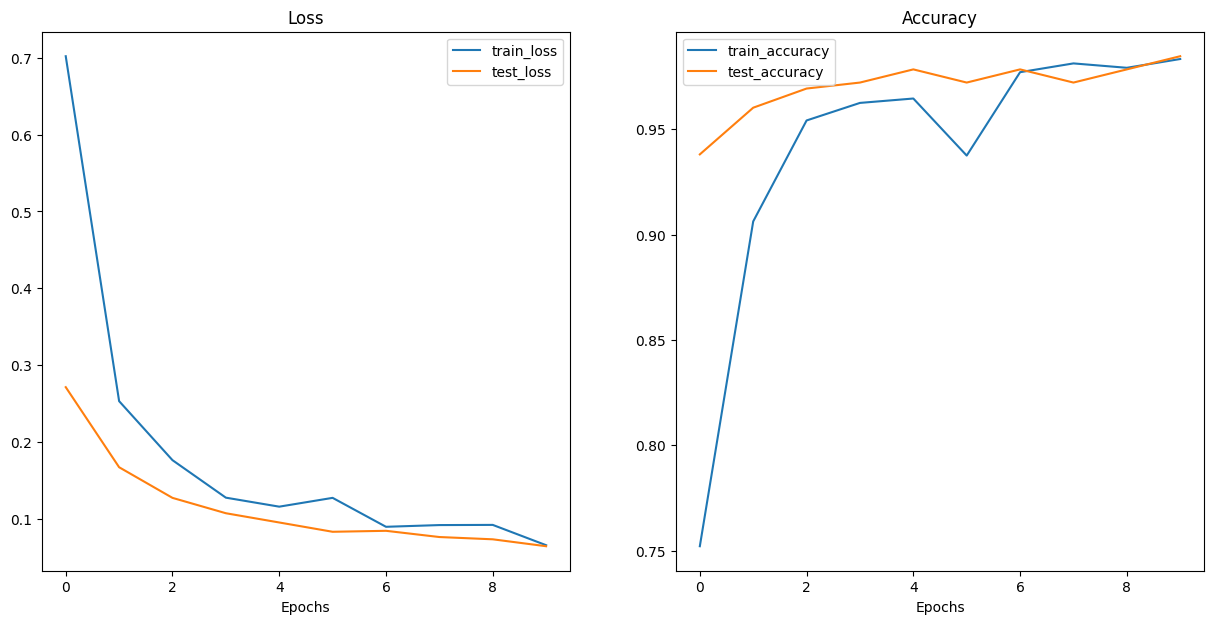

In [27]:
from helper_functions import plot_loss_curves

plot_loss_curves(vit_results)

4.4 Saving ViT feature extractor

In [28]:
# Save the model
from going_modular import utils

utils.save_model(model=vit,
                 target_dir="models",
                 model_name="09_pretrained_vit_feature_extractor_pizza_steak_sushi_20_percent.pth")

[INFO] Saving model to: models/09_pretrained_vit_feature_extractor_pizza_steak_sushi_20_percent.pth


4.5 Checking the size of ViT feature extractor

그리고 여러 가지 특성에서 EffNetB2 모델을 ViT 모델과 비교하고 싶으므로, 그 크기를 알아봅시다.

모델의 크기를 바이트 단위로 확인하려면 파이썬의 pathlib.Path.stat("path_to_model").st_size를 사용하여 (1024*1024)로 나누어 (대략) 메가바이트로 변환할 수 있습니다.

In [29]:
from pathlib import Path

# Get the model size in bytes then convert to megabytes
pretrained_vit_model_size = Path("models/09_pretrained_vit_feature_extractor_pizza_steak_sushi_20_percent.pth").stat().st_size // (1024*1024) # division converts bytes to megabytes (roughly) 
print(f"Pretrained ViT feature extractor model size: {pretrained_vit_model_size} MB")

Pretrained ViT feature extractor model size: 327 MB


4.6 Collecting ViT feature extractor stats

In [30]:
# Count number of parameters in ViT
vit_total_params = sum(torch.numel(param) for param in vit.parameters())
vit_total_params

85800963

In [31]:
# Create ViT statistics dictionary
vit_stats = {"test_loss": vit_results["test_loss"][-1],
             "test_acc": vit_results["test_acc"][-1],
             "number_of_parameters": vit_total_params,
             "model_size (MB)": pretrained_vit_model_size}

vit_stats

{'test_loss': 0.0644344771746546,
 'test_acc': 0.984659090909091,
 'number_of_parameters': 85800963,
 'model_size (MB)': 327}

### 5. Making predictions with our trained models and timing them

훈련된 모델 두개가 있는데 둘 다 꽤 잘 수행합니다.  

예측(추론 수행)을 어떻게 하는지 살펴봅시다.  

두 모델 모두 테스트 데이터 세트에서 95% 이상의 정확도로 작동한다는 것을 알고 있지만, 얼마나 빠를까요?  

이상적으로는 사람들이 음식 사진을 찍어 식별할 수 있도록 모바일 장치에 FoodVision Mini 모델을 배포하는 경우, 예측이 실시간으로(초당 약 30프레임) 이루어지기를 원합니다.  

그렇기 때문에 두 번째 베이스라인은 빠른 모델입니다.   

각 모델이 성능 추론에 얼마나 걸리는지 알아보기 위해 각 테스트 데이터 세트 이미지를 하나씩 반복하여 예측을 수행하는   pred_and_store()라는 함수를 만들어 보겠습니다.  

각 예측의 시간을 측정하고 결과를 일반적인 예측 형식인 사전 목록(목록의 각 요소는 단일 예측이고 각 죄수 예측은 사전)으로 저장합니다.  

참고: 모델이 배포될 때 한 번에 하나의 이미지에 대해서만 예측할 가능성이 높기 때문에 일괄적으로 예측하지 않고 하나씩 예측 시간을 정합니다. 즉, 누군가가 사진을 찍으면 모델이 그 한 장의 이미지에 대해 예측합니다.   

테스트 세트의 모든 이미지에 대해 예측을 하고 싶으므로 먼저 모든 테스트 이미지 경로의 목록을 가져와서 반복할 수 있도록 하겠습니다.  

이를 위해 Python의 pathlib.Path("target_dir").glob("*/*.jpg"))를 사용하여 확장자가 .jpg인 대상 디렉터리(모든 테스트 이미지)의 모든 파일 경로를 찾습니다.  

In [32]:
from pathlib import Path

# Get all test data paths
print(f"[INFO] Finding all filepaths ending with '.jpg' in directory: {test_dir}")
test_data_paths = list(Path(test_dir).glob("*/*.jpg"))
test_data_paths[:5]

[INFO] Finding all filepaths ending with '.jpg' in directory: data/pizza_steak_sushi_20_percent/test


[PosixPath('data/pizza_steak_sushi_20_percent/test/steak/413497.jpg'),
 PosixPath('data/pizza_steak_sushi_20_percent/test/steak/2246332.jpg'),
 PosixPath('data/pizza_steak_sushi_20_percent/test/steak/2475366.jpg'),
 PosixPath('data/pizza_steak_sushi_20_percent/test/steak/1982192.jpg'),
 PosixPath('data/pizza_steak_sushi_20_percent/test/steak/2353677.jpg')]

5.1 Creating a function to make predictions across the test dataset

1. 경로 목록, 훈련된 PyTorch 모델, 일련의 변환(이미지 준비), 대상 클래스 이름 목록 및 대상 장치를 취하는 함수를 만듭니다.

2. 예측 사전을 저장할 빈 목록을 생성합니다(함수가 각 예측에 대해 하나씩 사전 목록을 반환하기를 원합니다).

3. 대상 입력 경로를 반복합니다(4~14단계는 루프 내에서 수행됩니다).

4. 루프의 각 반복에 대해 빈 사전을 생성하여 샘플별 예측 값을 저장합니다.

5. 샘플 경로와 기준값 클래스 이름을 가져옵니다(경로에서 클래스를 추론하여 이 작업을 수행할 수 있습니다).

6. Python의 timeit.default_timer()를 사용하여 예측 타이머를 시작합니다.

7. PIL.Image.open(path)를 사용하여 이미지를 엽니다.

8. 대상 모델과 함께 사용할 수 있도록 이미지를 변환하고 배치 차원을 추가하여 대상 장치로 이미지를 보냅니다.

9. 모델을 대상 장치로 전송하고 eval() 모드를 켜서 추론할 모델을 준비합니다.

10. torch.inference_mode()를 켜고 변환된 대상 이미지를 모델에 전달한 다음 torch.softmax()를 사용하여 예측 확률을 계산하고 torch.argmax()를 사용하여 대상 레이블을 계산합니다.

11. 4단계에서 생성한 예측 사전에 예측 확률과 예측 클래스를 추가합니다. 또한 예측 확률이 CPU에 있는지 확인하여 나중에 검사할 수 있도록 NumPy 및 판다와 같은 비 GPU 라이브러리에서 사용할 수 있도록 합니다.

12. 6단계에서 시작한 예측 타이머를 종료하고 4단계에서 생성한 예측 사전에 시간을 추가합니다.

13. 예측된 클래스가 5단계의 기준 데이터 클래스와 일치하는지 확인하고 그 결과를 4단계에서 생성한 예측 사전에 추가합니다.

14. 업데이트된 예측 사전을 2단계에서 생성된 빈 예측 목록에 추가합니다.

15. 예측 사전 목록을 반환합니다.

In [33]:
import pathlib
import torch

from PIL import Image
from timeit import default_timer as timer 
from tqdm.auto import tqdm
from typing import List, Dict

In [34]:
# 1. Create a function to return a list of dictionaries with sample, truth label, prediction, prediction probability and prediction time
def pred_and_store(paths: List[pathlib.Path], 
                   model: torch.nn.Module,
                   transform: torchvision.transforms, 
                   class_names: List[str], 
                   device: str = "cuda" if torch.cuda.is_available() else "cpu") -> List[Dict]:
    
    # 2. Create an empty list to store prediction dictionaires
    pred_list = []
    
    # 3. Loop through target paths
    for path in tqdm(paths):
        
        # 4. Create empty dictionary to store prediction information for each sample
        pred_dict = {}
        
        # 5. Get the sample path and ground truth class name
        pred_dict["image_path"] = path
        class_name = path.parent.stem
        pred_dict["class_name"] = class_name
        
        # 6. Start the prediction timer
        start_time = timer()
        
        # 7. Open image path
        img = Image.open(path)
        
        # 8. Transform the image, add batch dimension and put image on target device
        transformed_image = transform(img).unsqueeze(0).to(device) 
        
        # 9. Prepare model for inference by sending it to target device and turning on eval() mode
        model.to(device)
        model.eval()
        
        # 10. Get prediction probability, predicition label and prediction class
        with torch.inference_mode():
            pred_logit = model(transformed_image) # perform inference on target sample 
            pred_prob = torch.softmax(pred_logit, dim=1) # turn logits into prediction probabilities
            pred_label = torch.argmax(pred_prob, dim=1) # turn prediction probabilities into prediction label
            pred_class = class_names[pred_label.cpu()] # hardcode prediction class to be on CPU

            # 11. Make sure things in the dictionary are on CPU (required for inspecting predictions later on) 
            pred_dict["pred_prob"] = round(pred_prob.unsqueeze(0).max().cpu().item(), 4)
            pred_dict["pred_class"] = pred_class
            
            # 12. End the timer and calculate time per pred
            end_time = timer()
            pred_dict["time_for_pred"] = round(end_time-start_time, 4)

        # 13. Does the pred match the true label?
        pred_dict["correct"] = class_name == pred_class

        # 14. Add the dictionary to the list of preds
        pred_list.append(pred_dict)
    
    # 15. Return list of prediction dictionaries
    return pred_list

예측을 만들고 저장하는 데 pred_and_store()는 매우 유용한 유틸리티 함수이므로 나중에 사용할 수 있도록 going_modular.going_modular.predictions.py에 저장할 수 있습니다. 이 확장을 시도해보고 싶으시다면 05. 파이토치 모듈형으로 가기에서 아이디어를 확인하세요.

5.2 Making and timing predictions with EffNetB2

이제 pred_and_store() 함수를 테스트해볼 시간입니다!

먼저 두 가지 세부 사항에 주의하면서 이 함수를 사용하여 EffNetB2 모델로 테스트 데이터 세트에 대한 예측을 수행해 보겠습니다:

1. 디바이스 - 모델을 배포할 때 항상 '쿠다'(GPU) 디바이스에 액세스할 수 있는 것은 아니므로 디바이스 파라미터를 'CPU'를 사용하도록 하드 코딩할 것입니다.
일반적으로 CPU 장치에서 예측하는 것이 GPU 장치보다 느리기 때문에 CPU에서 예측하는 것이 추론 속도를 나타내는 좋은 지표가 될 것입니다.  
2. 트랜스폼 - 또한 트랜스폼 매개변수를 effnetb2_transforms로 설정하여 이미지가 effnetb2 모델에 학습된 것과 동일한 방식으로 열리고 변형되도록 할 것입니다.

In [35]:
# Make predictions across test dataset with EffNetB2
effnetb2_test_pred_dicts = pred_and_store(paths=test_data_paths,
                                          model=effnetb2,
                                          transform=effnetb2_transforms,
                                          class_names=class_names,
                                          device="cpu") # make predictions on CPU 

100%|██████████| 150/150 [01:02<00:00,  2.39it/s]


In [36]:
# Inspect the first 2 prediction dictionaries
effnetb2_test_pred_dicts[:2]

[{'image_path': PosixPath('data/pizza_steak_sushi_20_percent/test/steak/413497.jpg'),
  'class_name': 'steak',
  'pred_prob': 0.9153,
  'pred_class': 'steak',
  'time_for_pred': 0.5938,
  'correct': True},
 {'image_path': PosixPath('data/pizza_steak_sushi_20_percent/test/steak/2246332.jpg'),
  'class_name': 'steak',
  'pred_prob': 0.9216,
  'pred_class': 'steak',
  'time_for_pred': 0.4012,
  'correct': True}]

In [37]:
# Turn the test_pred_dicts into a DataFrame
import pandas as pd
effnetb2_test_pred_df = pd.DataFrame(effnetb2_test_pred_dicts)
effnetb2_test_pred_df.head()

image_path class_name  pred_prob  \
0  data/pizza_steak_sushi_20_percent/test/steak/4...      steak     0.9153   
1  data/pizza_steak_sushi_20_percent/test/steak/2...      steak     0.9216   
2  data/pizza_steak_sushi_20_percent/test/steak/2...      steak     0.8720   
3  data/pizza_steak_sushi_20_percent/test/steak/1...      steak     0.6192   
4  data/pizza_steak_sushi_20_percent/test/steak/2...      steak     0.5794   

  pred_class  time_for_pred  correct  
0      steak         0.5938     True  
1      steak         0.4012     True  
2      steak         0.4574     True  
3      steak         0.4101     True  
4      steak         0.4154     True

In [38]:
# Check number of correct predictions
effnetb2_test_pred_df.correct.value_counts()

correct
True     144
False      6
Name: count, dtype: int64

평균 예측시간을 계산해보자.

In [39]:
# Find the average time per prediction 
effnetb2_average_time_per_pred = round(effnetb2_test_pred_df.time_for_pred.mean(), 4)
print(f"EffNetB2 average time per prediction: {effnetb2_average_time_per_pred} seconds")

EffNetB2 average time per prediction: 0.4183 seconds


그렇다면 평균 예측 시간은 실시간 모델 성능 기준(예측당 ~30FPS 또는 0.03초)에 어떻게 부합하나요?

참고: 하드웨어 유형에 따라 예측 시간은 달라질 수 있습니다(예: 로컬 인텔 i9 대 Google Colab CPU). 일반적으로 하드웨어가 더 우수하고 빠를수록 예측 속도가 빨라집니다. 예를 들어, 인텔 i9 칩이 탑재된 로컬 딥 러닝 PC에서 EffNetB2를 사용한 평균 예측 시간은 약 0.031초(실시간에 약간 못 미침)입니다. 하지만 Google Colab(Colab에서 어떤 CPU 하드웨어를 사용하는지는 잘 모르겠지만 인텔(R) 제온(R)인 것 같습니다)에서는 EffNetB2를 사용한 평균 예측 시간이 약 0.1396초(3~4배 느립니다)였습니다.

EffNetB2의 예측당 평균 시간을 effnetb2_stats 딕셔너리에 추가해 보겠습니다.

In [40]:
# Add EffNetB2 average prediction time to stats dictionary 
effnetb2_stats["time_per_pred_cpu"] = effnetb2_average_time_per_pred
effnetb2_stats

{'test_loss': 0.2836607813835144,
 'test_acc': 0.9625,
 'number_of_parameters': 7705221,
 'model_size (MB)': 29,
 'time_per_pred_cpu': 0.4183}

5.3 Making and timing predictions with ViT

In [41]:
# Make list of prediction dictionaries with ViT feature extractor model on test images
vit_test_pred_dicts = pred_and_store(paths=test_data_paths,
                                     model=vit,
                                     transform=vit_transforms,
                                     class_names=class_names,
                                     device="cpu")

100%|██████████| 150/150 [00:12<00:00, 11.96it/s]


In [42]:
# Check the first couple of ViT predictions on the test dataset
vit_test_pred_dicts[:2]

[{'image_path': PosixPath('data/pizza_steak_sushi_20_percent/test/steak/413497.jpg'),
  'class_name': 'steak',
  'pred_prob': 0.7962,
  'pred_class': 'steak',
  'time_for_pred': 0.2111,
  'correct': True},
 {'image_path': PosixPath('data/pizza_steak_sushi_20_percent/test/steak/2246332.jpg'),
  'class_name': 'steak',
  'pred_prob': 0.9981,
  'pred_class': 'steak',
  'time_for_pred': 0.0848,
  'correct': True}]

In [43]:
# Turn vit_test_pred_dicts into a DataFrame
import pandas as pd
vit_test_pred_df = pd.DataFrame(vit_test_pred_dicts)
vit_test_pred_df.head()

image_path class_name  pred_prob  \
0  data/pizza_steak_sushi_20_percent/test/steak/4...      steak     0.7962   
1  data/pizza_steak_sushi_20_percent/test/steak/2...      steak     0.9981   
2  data/pizza_steak_sushi_20_percent/test/steak/2...      steak     0.9959   
3  data/pizza_steak_sushi_20_percent/test/steak/1...      steak     0.9863   
4  data/pizza_steak_sushi_20_percent/test/steak/2...      steak     0.9519   

  pred_class  time_for_pred  correct  
0      steak         0.2111     True  
1      steak         0.0848     True  
2      steak         0.0815     True  
3      steak         0.0829     True  
4      steak         0.0820     True

In [44]:
# Count the number of correct predictions
vit_test_pred_df.correct.value_counts()

correct
True     148
False      2
Name: count, dtype: int64

ViT 모델은 전체 테스트 데이터 세트에서 단 두 개의 샘플만 잘못 예측하는 등 정확한 예측 측면에서 EffNetB2 모델보다 조금 더 나은 성능을 보였습니다.

확장 기능으로 ViT 모델의 잘못된 예측을 시각화하여 예측이 틀린 이유가 있는지 확인할 수 있습니다.

ViT 모델이 각 예측에 걸린 시간을 계산해 보면 어떨까요?

In [45]:
# Calculate average time per prediction for ViT model
vit_average_time_per_pred = round(vit_test_pred_df.time_for_pred.mean(), 4)
print(f"ViT average time per prediction: {vit_average_time_per_pred} seconds")

ViT average time per prediction: 0.0833 seconds


이 값은 EffNetB2 모델의 예측당 평균 시간보다 약간 느리게 보이지만 두 번째 기준인 속도 측면에서 보면 어떻게 될까요?

지금은 이 값을 vit_stats 딕셔너리에 추가하여 EffNetB2 모델의 통계와 비교해 보겠습니다.

In [46]:
# Add average prediction time for ViT model on CPU
vit_stats["time_per_pred_cpu"] = vit_average_time_per_pred
vit_stats

{'test_loss': 0.0644344771746546,
 'test_acc': 0.984659090909091,
 'number_of_parameters': 85800963,
 'model_size (MB)': 327,
 'time_per_pred_cpu': 0.0833}

### 6. Comparing model results, prediction times and size

이제 두 모델을 나란히 놓고 서로 다른 통계를 비교해 보겠습니다.

이를 위해 effnetb2_stats 및 vit_stats 사전을 판다 데이터 프레임으로 바꾸겠습니다.

모델 이름을 볼 수 있는 열을 추가하고 테스트 정확도를 소수점이 아닌 전체 백분율로 변환하겠습니다.

In [47]:
# Turn stat dictionaries into DataFrame
df = pd.DataFrame([effnetb2_stats, vit_stats])

# Add column for model names
df["model"] = ["EffNetB2", "ViT"]

# Convert accuracy to percentages
df["test_acc"] = round(df["test_acc"] * 100, 2)

df

test_loss  test_acc  number_of_parameters  model_size (MB)  \
0   0.283661     96.25               7705221               29   
1   0.064434     98.47              85800963              327   

   time_per_pred_cpu     model  
0             0.4183  EffNetB2  
1             0.0833       ViT

전반적인 테스트 정확도 측면에서 두 모델이 상당히 비슷해 보이지만 다른 분야에서는 어떤 차이가 있을까요?

이를 알아내는 한 가지 방법은 ViT 모델 통계를 EffNetB2 모델 통계로 나누어 모델 간의 다른 비율을 알아내는 것입니다.

이를 위해 다른 데이터 프레임을 만들어 보겠습니다.

In [48]:
# Compare ViT to EffNetB2 across different characteristics
pd.DataFrame(data=(df.set_index("model").loc["ViT"] / df.set_index("model").loc["EffNetB2"]), # divide ViT statistics by EffNetB2 statistics
             columns=["ViT to EffNetB2 ratios"]).T

test_loss  test_acc  number_of_parameters  \
ViT to EffNetB2 ratios   0.227153  1.023065             11.135432   

                        model_size (MB)  time_per_pred_cpu  
ViT to EffNetB2 ratios        11.275862           0.199139

ViT 모델은 성능 지표(테스트 손실은 낮을수록 좋고 테스트 정확도는 높을수록 좋음) 전반에서 EffNetB2 모델보다 우수한 성능을 보이지만, 그 대가로 다음과 같은 비용이 발생합니다:

- 11배 이상의 매개변수 수
- 11배 이상의 모델 크기.
- 이미지당 예측 시간이 2.5배 이상 증가합니다.

이러한 장단점이 그만한 가치가 있을까요?

만약 컴퓨팅 성능이 무제한으로 제공되지만 더 작은 디바이스(예: 휴대폰)에 FoodVision Mini 모델을 배포하는 사용 사례의 경우, 성능은 약간 떨어지지만 크기가 훨씬 작고 예측 속도가 더 빠른 EffNetB2 모델로 시작할 수 있습니다.

6.1 Visualizing the speed vs. performance tradeoff

테스트 손실 및 테스트 정확도와 같은 성능 지표 측면에서 ViT 모델이 EffNetB2 모델보다 성능이 뛰어나다는 것을 확인했습니다.

그러나 EffNetB2 모델은 예측을 더 빠르게 수행하며 모델 크기가 훨씬 작습니다.

참고: 성능 또는 추론 시간은 종종 "latency"이라고도 합니다.

이 사실을 시각화하면 어떨까요?

matplotlib로 플롯을 만들면 됩니다:

1. 비교 데이터프레임에서 산점도를 생성하여 EffNetB2와 ViT time_per_pred_cpu 및 test_acc 값을 비교합니다.  
2. 데이터에 각각 제목과 레이블을 추가하고 미적 감각을 위해 글꼴 크기를 사용자 지정합니다.  
3. 1단계의 산점도의 샘플에 적절한 레이블(모델 이름)을 붙여 주석을 달 수 있습니다.  
4. 모델 크기(모델_크기(MB))를 기준으로 범례를 만듭니다.  

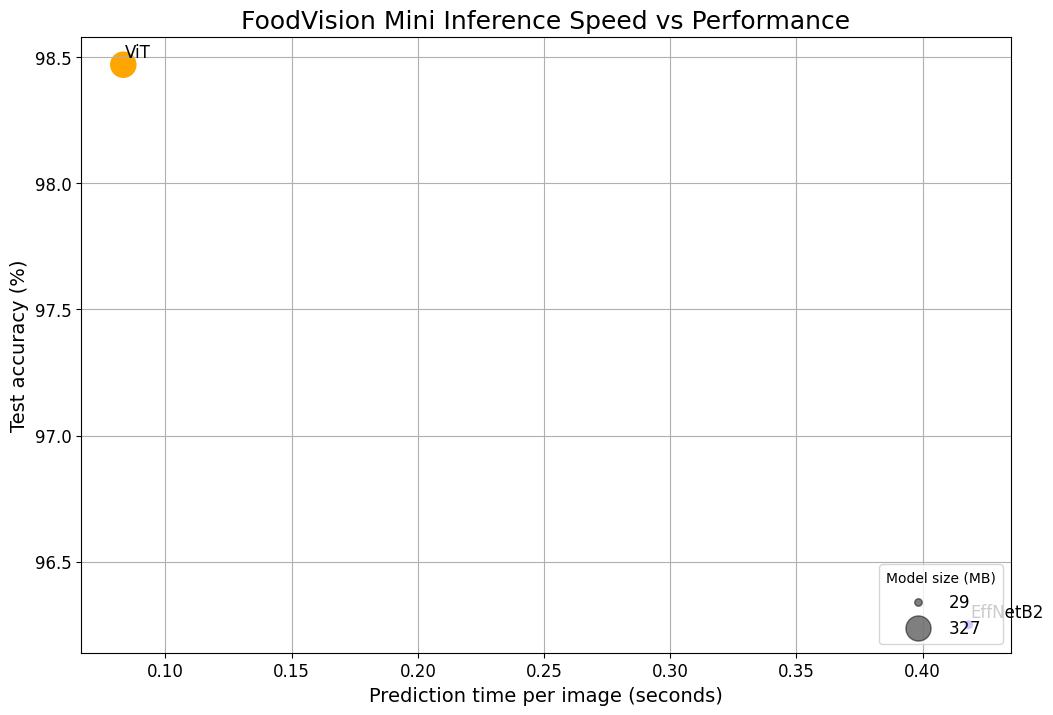

In [49]:
# 1. Create a plot from model comparison DataFrame
fig, ax = plt.subplots(figsize=(12, 8))
scatter = ax.scatter(data=df, 
                     x="time_per_pred_cpu", 
                     y="test_acc", 
                     c=["blue", "orange"], # what colours to use?
                     s="model_size (MB)") # size the dots by the model sizes

# 2. Add titles, labels and customize fontsize for aesthetics
ax.set_title("FoodVision Mini Inference Speed vs Performance", fontsize=18)
ax.set_xlabel("Prediction time per image (seconds)", fontsize=14)
ax.set_ylabel("Test accuracy (%)", fontsize=14)
ax.tick_params(axis='both', labelsize=12)
ax.grid(True)

# 3. Annotate with model names
for index, row in df.iterrows():
    ax.annotate(text=row["model"], # note: depending on your version of Matplotlib, you may need to use "s=..." or "text=...", see: https://github.com/faustomorales/keras-ocr/issues/183#issuecomment-977733270 
                xy=(row["time_per_pred_cpu"]+0.0006, row["test_acc"]+0.03),
                size=12)

# 4. Create a legend based on model sizes
handles, labels = scatter.legend_elements(prop="sizes", alpha=0.5)
model_size_legend = ax.legend(handles, 
                              labels, 
                              loc="lower right", 
                              title="Model size (MB)",
                              fontsize=12)

# Show the figure
plt.show()

이 도표는 속도와 성능의 상충 관계를 시각적으로 보여줍니다.  
즉, 더 크고 성능이 좋은 심층 모델(예: ViT 모델)을 사용하면 일반적으로 추론을 수행하는 데 시간이 더 오래 걸립니다(지연 시간이 길어짐).

이 규칙에는 예외가 있으며, 더 큰 모델의 성능을 더 빠르게 만드는 데 도움이 되는 새로운 연구가 항상 발표되고 있습니다.

가장 성능이 좋은 모델을 배포하고 싶은 유혹이 있을 수 있지만, 모델이 어디에 사용될 것인지도 고려하는 것이 좋습니다.

저희의 경우 모델의 성능 수준(테스트 손실 및 테스트 정확도)의 차이는 그리 크지 않습니다.

하지만 우선은 속도에 중점을 두고 싶기 때문에 속도가 더 빠르고 설치 공간이 훨씬 작은 EffNetB2를 계속 배포할 것입니다.

참고: 하드웨어 유형에 따라 예측 시간이 달라질 수 있으므로(예: Intel i9 대 Google Colab CPU 대 GPU), 모델이 최종적으로 어디까지 도달할지 생각하고 테스트하는 것이 중요합니다. "모델을 어디에서 실행할 것인가?" 또는 "모델을 실행하는 이상적인 시나리오는 무엇인가?"와 같은 질문을 던진 다음 실험을 실행하여 배포하는 과정에서 답을 찾는 것이 매우 유용합니다.

### 7. Bringing FoodVision Mini to life by creating a Gradio demo

우선 EffNetB2 모델을 배포하기로 결정했습니다(나중에 언제든지 변경할 수 있습니다).

그렇다면 어떻게 배포할 수 있을까요?

머신 러닝 모델을 배포하는 방법에는 여러 가지가 있으며, 각각 특정 사용 사례에 따라 다릅니다(위에서 설명한 대로).

여기서는 모델을 인터넷에 배포하는 가장 빠르고 재미있는 방법 중 하나에 초점을 맞추겠습니다.

바로 Gradio를 사용하는 것입니다.

Gradio란 무엇인가요?

홈페이지에 잘 설명되어 있습니다:

Gradio는 친숙한 웹 인터페이스를 통해 머신 러닝 모델을 데모하는 가장 빠른 방법으로, 누구나 어디서나 사용할 수 있습니다!

모델 데모를 만드는 이유는 무엇인가요?

테스트 세트의 메트릭은 멋져 보이지만 실제로 사용하기 전까지는 모델이 어떻게 작동하는지 알 수 없기 때문입니다.

이제 배포를 시작하겠습니다!

In [51]:
try:
    import gradio as gr
except: 
    !pip -q install gradio
    import gradio as gr
    
print(f"Gradio version: {gr.__version__}")

Gradio version: 4.7.1


7.1 Gradio overview

Gradio의 전반적인 전제는 교육 과정 내내 반복해 온 내용과 매우 유사합니다.

입력과 출력은 무엇일까요?

그리고 어떻게 해야 할까요?

바로 머신러닝 모델이 하는 일입니다.

입력 -> ML 모델 -> 출력
FoodVision Mini의 경우, 입력은 음식 이미지, ML 모델은 EffNetB2, 출력은 음식 클래스(피자, 스테이크, 초밥)입니다.

음식 이미지 -> EffNetB2 -> 출력
입력과 출력의 개념은 거의 모든 다른 종류의 ML 문제에 연결될 수 있습니다.

입력과 출력은 다음의 모든 조합이 될 수 있습니다:

이미지
텍스트
비디오
표 형식 데이터
오디오
숫자
기타
그리고 구축하는 ML 모델은 입력과 출력에 따라 달라집니다.

Gradio는 입력에서 출력까지 인터페이스(gradio.Interface())를 생성하여 이 패러다임을 에뮬레이트합니다.

gradio.Interface(fn, 입력, 출력)
여기서 fn은 입력을 출력에 매핑하는 파이썬 함수입니다.

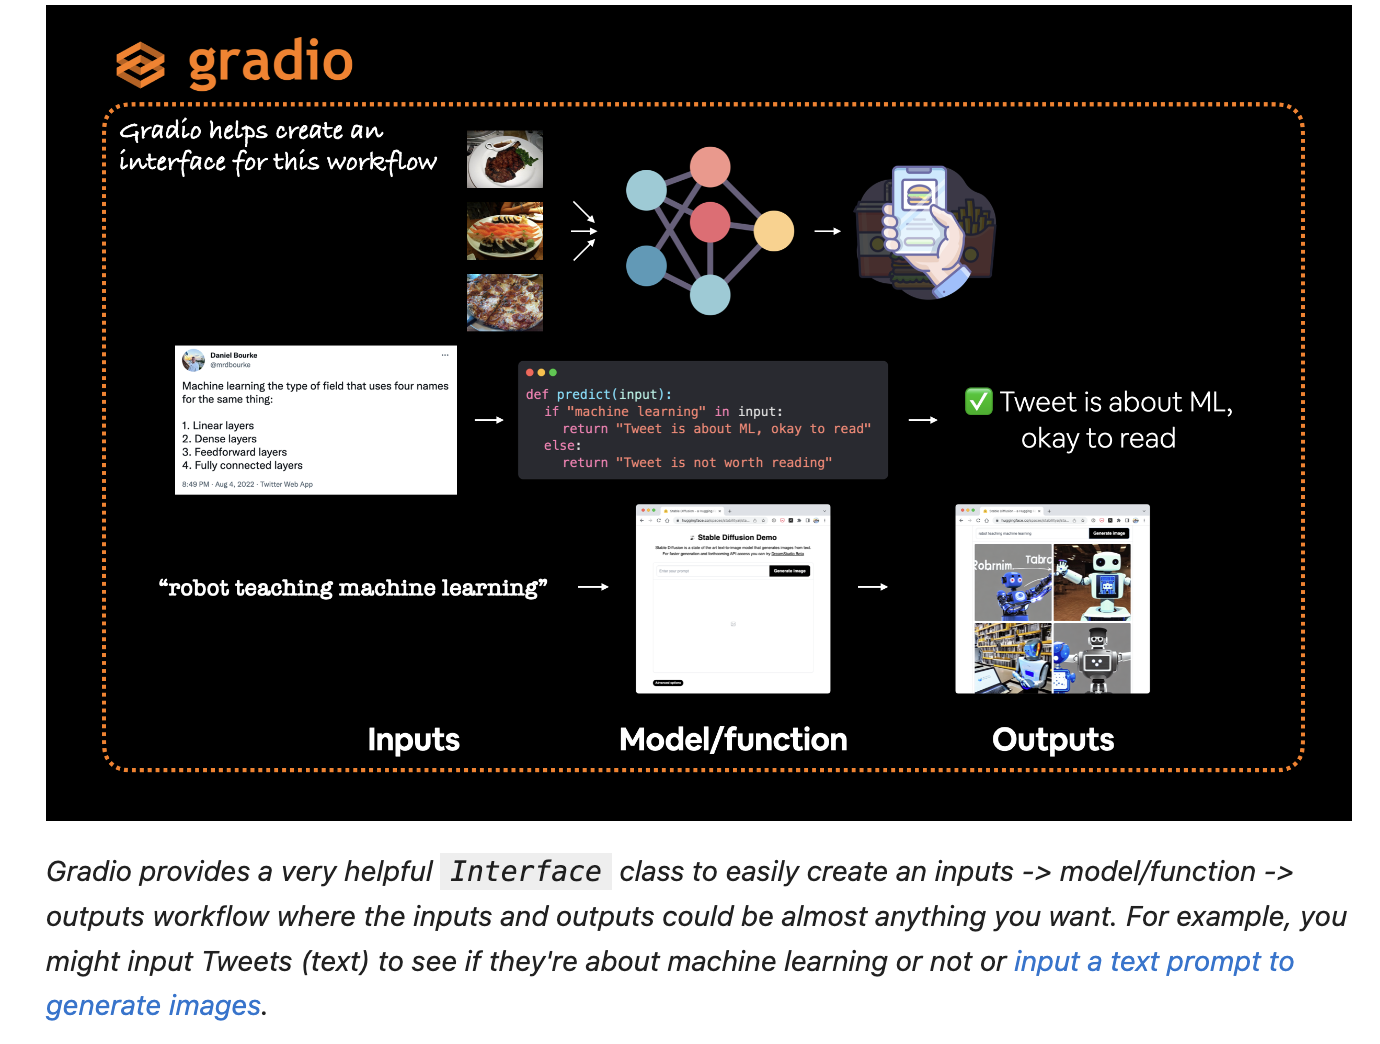

7.2 Creating a function to map our inputs and outputs

Gradio로 FoodVision Mini 데모를 만들려면 입력을 출력에 매핑하는 함수가 필요합니다.

앞서 대상 파일 목록에서 주어진 모델로 예측을 수행하고 이를 사전 목록에 저장하는 pred_and_store()라는 함수를 만들었습니다.

비슷한 함수를 만들되 이번에는 EffNetB2 모델을 사용하여 단일 이미지를 예측하는 데 초점을 맞춰 보겠습니다.

좀 더 구체적으로, 이미지를 입력으로 받아 전처리(변환)한 다음 EffNetB2로 예측을 한 다음 예측(줄여서 예측 또는 예측 레이블)과 예측 확률(예측 확률)을 반환하는 함수를 만들고자 합니다.

이왕 하는 김에 예측에 걸린 시간도 반환해 보겠습니다:

입력: 이미지 -> 변환 -> EffNetB2로 예측 -> 출력: pred, pred prob, 걸린 시간
이것이 Gradio 인터페이스의 fn 매개변수가 될 것입니다.

먼저 EffNetB2 모델이 CPU에 있는지 확인하겠습니다(CPU 전용 예측을 고수하고 있지만 GPU에 액세스할 수 있는 경우 이를 변경할 수 있습니다).

In [52]:
# Put EffNetB2 on CPU
effnetb2.to("cpu") 

# Check the device
next(iter(effnetb2.parameters())).device

device(type='cpu')

predict 함수 만들기

In [53]:
from typing import Tuple, Dict

def predict(img) -> Tuple[Dict, float]:
    """Transforms and performs a prediction on img and returns prediction and time taken.
    """
    # Start the timer
    start_time = timer()
    
    # Transform the target image and add a batch dimension
    img = effnetb2_transforms(img).unsqueeze(0)
    
    # Put model into evaluation mode and turn on inference mode
    effnetb2.eval()
    with torch.inference_mode():
        # Pass the transformed image through the model and turn the prediction logits into prediction probabilities
        pred_probs = torch.softmax(effnetb2(img), dim=1)
    
    # Create a prediction label and prediction probability dictionary for each prediction class (this is the required format for Gradio's output parameter)
    pred_labels_and_probs = {class_names[i]: float(pred_probs[0][i]) for i in range(len(class_names))}
    
    # Calculate the prediction time
    pred_time = round(timer() - start_time, 5)
    
    # Return the prediction dictionary and prediction time 
    return pred_labels_and_probs, pred_time

이제 테스트 데이터 세트에서 임의의 이미지에 대해 예측을 수행하여 함수가 실제로 작동하는지 확인해 보겠습니다.

먼저 테스트 디렉토리에서 모든 이미지 경로의 목록을 가져온 다음 무작위로 하나를 선택합니다.

그런 다음 PIL.Image.open()을 사용하여 무작위로 선택된 이미지를 엽니다.

마지막으로 이미지를 예측() 함수에 전달합니다.

In [54]:
import random
from PIL import Image

# Get a list of all test image filepaths
test_data_paths = list(Path(test_dir).glob("*/*.jpg"))

# Randomly select a test image path
random_image_path = random.sample(test_data_paths, k=1)[0]

# Open the target image
image = Image.open(random_image_path)
print(f"[INFO] Predicting on image at path: {random_image_path}\n")

# Predict on the target image and print out the outputs
pred_dict, pred_time = predict(img=image)
print(f"Prediction label and probability dictionary: \n{pred_dict}")
print(f"Prediction time: {pred_time} seconds")

[INFO] Predicting on image at path: data/pizza_steak_sushi_20_percent/test/sushi/720302.jpg

Prediction label and probability dictionary: 
{'pizza': 0.33305180072784424, 'steak': 0.16161170601844788, 'sushi': 0.5053365230560303}
Prediction time: 0.43916 seconds


7.3 Creating a list of example images

predict() 함수를 사용하면 입력 -> 변환 -> ML 모델 -> 출력으로 이동할 수 있습니다.

이것이 바로 Graido 데모에 필요한 것입니다.  
하지만 데모를 만들기 전에 예제 리스트를 하나 더 만들어 봅시다.  

Gradio의 인터페이스 클래스는 선택적 매개변수로 예제 목록을 받습니다(gradio.Interface(examples=List[Any])).  

그리고 예제 매개변수의 형식은 목록 목록입니다.  

따라서 테스트 이미지에 대한 임의의 파일 경로를 포함하는 목록 목록을 만들어 보겠습니다.  

세 가지 예제면 충분합니다.

In [55]:
# Create a list of example inputs to our Gradio demo
example_list = [[str(filepath)] for filepath in random.sample(test_data_paths, k=3)]
example_list

[['data/pizza_steak_sushi_20_percent/test/pizza/998005.jpg'],
 ['data/pizza_steak_sushi_20_percent/test/steak/697562.jpg'],
 ['data/pizza_steak_sushi_20_percent/test/pizza/2997525.jpg']]

7.4 Building a Gradio interface

이제 모든 것을 조합하여 FoodVision Mini 데모에 생명을 불어넣을 시간입니다!

워크플로우를 재현하기 위해 Gradio 인터페이스를 만들어 보겠습니다:

입력: 이미지 -> 변환 -> EffNetB2로 예측 -> 출력: 예측, 예측 확률, 소요 시간

다음 매개 변수를 사용하여 gradio.Interface() 클래스로 할 수 있습니다:

- fn - 입력을 출력에 매핑하는 Python 함수, 여기서는 예측() 함수를 사용하겠습니다.  
- inputs - 인터페이스에 대한 입력(예: gradio.Image() 또는 "image"를 사용하는 이미지).  
- outputs - 입력이 fn을 통과한 후 인터페이스의 출력, 예를 들어 gradio.Label()(모델의 예측 레이블)을 사용한 레이블 또는 gradio.Number()(모델의 예측 시간)를 사용한 숫자입니다.  
    - 참고: Gradio에는 "구성 요소"라고 하는 다양한 입력 및 출력 옵션이 내장되어 있습니다.
- examples - 데모에 보여줄 예제 목록입니다.  
- title - 데모의 문자열 제목입니다.  
- description - 데모에 대한 문자열 설명입니다.  
- article - 데모 하단에 있는 참조 노트입니다.  

gr.Interface()의 데모 인스턴스를 만들었으면 gradio.Interface().launch() 또는 demo.launch() 명령을 사용하여 데모를 실행할 수 있습니다.

In [56]:
import gradio as gr

# Create title, description and article strings
title = "FoodVision Mini 🍕🥩🍣"
description = "An EfficientNetB2 feature extractor computer vision model to classify images of food as pizza, steak or sushi."
article = "Created at [09. PyTorch Model Deployment](https://www.learnpytorch.io/09_pytorch_model_deployment/)."

# Create the Gradio demo
demo = gr.Interface(fn=predict, # mapping function from input to output
                    inputs=gr.Image(type="pil"), # what are the inputs?
                    outputs=[gr.Label(num_top_classes=3, label="Predictions"), # what are the outputs?
                             gr.Number(label="Prediction time (s)")], # our fn has two outputs, therefore we have two outputs
                    examples=example_list, 
                    title=title,
                    description=description,
                    article=article)

# Launch the demo!
demo.launch(debug=False, # print errors locally?
            share=True) # generate a publically shareable URL?

Running on local URL:  http://127.0.0.1:7860
Running on public URL: https://035e21bb63c70adf07.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


### 8. Turning our FoodVision Mini Gradio Demo into a deployable app

Gradio 데모를 통해 푸드비전 미니 모델이 현실로 다가오는 것을 보았습니다.

하지만 이 모델을 친구들과 공유하고 싶다면 어떻게 해야 할까요?

제공된 Gradio 링크를 사용할 수 있지만, 공유 링크는 72시간 동안만 지속됩니다.

푸드비전 미니 데모를 더 영구적으로 사용하려면 앱으로 패키징하여 허깅 페이스 스페이스에 업로드할 수 있습니다.

8.1 What is Hugging Face Spaces?

허깅 페이스 스페이스는 머신 러닝 앱을 호스팅하고 공유할 수 있는 리소스입니다.   

데모를 빌드하는 것은 여러분이 수행한 작업을 보여주고 테스트할 수 있는 가장 좋은 방법 중 하나입니다.   

그리고 스페이스를 사용하면 바로 그렇게 할 수 있습니다.   

Hugging Face는 머신 러닝의 깃허브라고 생각하시면 됩니다.   

좋은 GitHub 포트폴리오가 코딩 능력을 보여준다면, 좋은 Hugging Face 포트폴리오가 머신 러닝 능력을 보여줄 수 있습니다.  

참고: 구글 클라우드, AWS(아마존 웹 서비스) 또는 기타 클라우드 공급업체 등 Gradio 앱을 업로드하고 호스팅할 수 있는 다른 많은 장소가 있지만, 머신 러닝 커뮤니티에서 사용하기 쉽고 널리 채택된 Hugging Face 스페이스를 사용하려고 합니다.

8.2 Deployed Gradio app structure

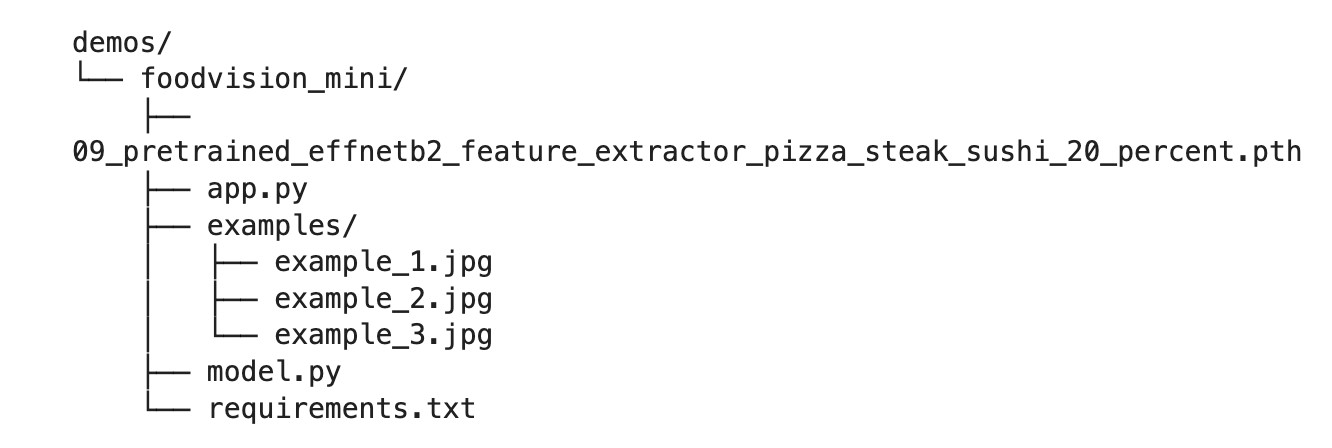

데모 Gradio 앱을 업로드하려면 앱과 관련된 모든 것을 단일 디렉토리에 넣어야 합니다.

예를 들어, 데모는 파일 구조가 demos/foodvision_mini/인 경로에 있을 수 있습니다:

여기서   

- 09_pretrained_effnetb2_feature_extractor_pizza_steak_sushi_20_percent.pth는 훈련된 PyTorch 모델 파일입니다.
- app.py에는 (앱을 실행한 코드와 유사한) Gradio 앱이 포함되어 있습니다.
    - 참고: app.py는 Hugging Face 스페이스에 사용되는 기본 파일 이름으로, 이 파일에 앱을 배포하면 스페이스는 기본적으로 app.py라는 파일을 찾아 실행합니다. 이는 설정에서 변경할 수 있습니다.
- examples/에는 Gradio 앱에 사용할 예제 이미지가 포함되어 있습니다.
- model.py에는 모델 정의와 모델과 연관된 모든 트랜스폼이 포함됩니다.
- requirements.txt에는 토치, 토치비전, 그라디오 등 앱을 실행하기 위한 종속성이 포함되어 있습니다.

- https://huggingface.co/spaces/mrdbourke/foodvision_mini   
- https://huggingface.co/spaces/mrdbourke/foodvision_mini/tree/main

8.3 Creating a demos folder to store our FoodVision Mini app files

작하려면 먼저 모든 FoodVision Mini 앱 파일을 저장할 데모/디렉토리를 만들어 보겠습니다.

파이썬의 pathlib.Path("path_to_dir")를 사용하여 디렉터리 경로를 설정하고 pathlib.Path("path_to_dir").mkdir()을 사용하여 생성할 수 있습니다.

In [1]:
import shutil
from pathlib import Path

# Create FoodVision mini demo path
foodvision_mini_demo_path = Path("demos/foodvision_mini/")

# Remove files that might already exist there and create new directory
if foodvision_mini_demo_path.exists():
    shutil.rmtree(foodvision_mini_demo_path)
    foodvision_mini_demo_path.mkdir(parents=True, # make the parent folders?
                                    exist_ok=True) # create it even if it already exists?
else:
    # If the file doesn't exist, create it anyway
    foodvision_mini_demo_path.mkdir(parents=True, 
                                    exist_ok=True)
    
# Check what's in the folder
!ls demos/foodvision_mini/

8.4 Creating a folder of example images to use with our FoodVision Mini demo

이제 푸드비전 미니 데모 파일을 저장할 디렉토리가 생겼으니, 여기에 몇 가지 예제를 추가해 보겠습니다.

테스트 데이터 세트의 예제 이미지 3개면 충분합니다.

이렇게 하려면 다음과 같이 하세요:

- demos/foodvision_mini 디렉터리 내에 examples/ 디렉터리를 만듭니다.
- 테스트 데이터 세트에서 무작위로 이미지 세 개를 선택하고 파일 경로를 목록으로 수집합니다.
- 테스트 데이터 세트의 무작위 이미지 세 개를 demos/foodvision_mini/examples/ 디렉토리에 복사합니다.

In [2]:
import shutil
from pathlib import Path

# 1. Create an examples directory
foodvision_mini_examples_path = foodvision_mini_demo_path / "examples"
foodvision_mini_examples_path.mkdir(parents=True, exist_ok=True)

# 2. Collect three random test dataset image paths
foodvision_mini_examples = [Path('data/pizza_steak_sushi_20_percent/test/sushi/592799.jpg'),
                            Path('data/pizza_steak_sushi_20_percent/test/steak/3622237.jpg'),
                            Path('data/pizza_steak_sushi_20_percent/test/pizza/2582289.jpg')]

# 3. Copy the three random images to the examples directory
for example in foodvision_mini_examples:
    destination = foodvision_mini_examples_path / example.name
    print(f"[INFO] Copying {example} to {destination}")
    shutil.copy2(src=example, dst=destination)

[INFO] Copying data/pizza_steak_sushi_20_percent/test/sushi/592799.jpg to demos/foodvision_mini/examples/592799.jpg
[INFO] Copying data/pizza_steak_sushi_20_percent/test/steak/3622237.jpg to demos/foodvision_mini/examples/3622237.jpg
[INFO] Copying data/pizza_steak_sushi_20_percent/test/pizza/2582289.jpg to demos/foodvision_mini/examples/2582289.jpg


이제 예제가 있는지 확인하기 위해 os.listdir()을 사용하여 데모/푸드비전_미니/예제/ 디렉터리의 내용을 나열한 다음 파일 경로를 목록 목록으로 포맷해 보겠습니다(Gradio의 gradio.Interface() 예제 매개 변수와 호환되도록).

In [3]:
import os

# Get example filepaths in a list of lists
example_list = [["examples/" + example] for example in os.listdir(foodvision_mini_examples_path)]
example_list

[['examples/2582289.jpg'], ['examples/592799.jpg'], ['examples/3622237.jpg']]

8.5 Moving our trained EffNetB2 model to our FoodVision Mini demo directory

이전에 FoodVision Mini EffNetB2 특징 추출기 모델을 models/09_pretrained_effnetb2_feature_extractor_pizza_steak_sushi_20_percent.pth에 저장했습니다.

저장된 모델 파일을 두 배로 늘리기 위해 모델을 demos/foodvision_mini 디렉토리로 이동해 보겠습니다.

Python의 shutil.move() 메서드를 사용하여 src(대상 파일의 소스 경로) 및 dst(이동하려는 대상 파일의 대상 경로) 매개 변수를 전달하면 됩니다.

In [4]:
import shutil

# Create a source path for our target model
effnetb2_foodvision_mini_model_path = "models/09_pretrained_effnetb2_feature_extractor_pizza_steak_sushi_20_percent.pth"

# Create a destination path for our target model 
effnetb2_foodvision_mini_model_destination = foodvision_mini_demo_path / effnetb2_foodvision_mini_model_path.split("/")[1]

# Try to move the file
try:
    print(f"[INFO] Attempting to move {effnetb2_foodvision_mini_model_path} to {effnetb2_foodvision_mini_model_destination}")
    
    # Move the model
    shutil.move(src=effnetb2_foodvision_mini_model_path, 
                dst=effnetb2_foodvision_mini_model_destination)
    
    print(f"[INFO] Model move complete.")

# If the model has already been moved, check if it exists
except:
    print(f"[INFO] No model found at {effnetb2_foodvision_mini_model_path}, perhaps its already been moved?")
    print(f"[INFO] Model exists at {effnetb2_foodvision_mini_model_destination}: {effnetb2_foodvision_mini_model_destination.exists()}")

[INFO] Attempting to move models/09_pretrained_effnetb2_feature_extractor_pizza_steak_sushi_20_percent.pth to demos/foodvision_mini/09_pretrained_effnetb2_feature_extractor_pizza_steak_sushi_20_percent.pth
[INFO] Model move complete.


8.6 Turning our EffNetB2 model into a Python script (model.py)

현재 모델의 state_dict는 demos/foodvision_mini/09_pretrained_effnetb2_feature_extractor_pizza_steak_sushi_20_percent.pth에 저장되어 있습니다.  

이를 로드하려면 torch.load()와 함께 model.load_state_dict()를 사용하면 됩니다.  

참고: 모델(또는 파이토치에서 모델의 state_dict)을 저장하고 로드하는 방법을 새로 고치려면 01. 파이토치 워크플로 기본 사항 섹션 5: 파이토치 모델 저장 및 로드하기 또는 파이토치 레시피의 파이토치에서 state_dict란 무엇인가요?  

하지만 이 작업을 수행하기 전에 먼저 모델을 인스턴스화할 방법이 필요합니다.  

모듈식 방식으로 이를 수행하기 위해 3.1절에서 만든 create_effnetb2_model() 함수가 포함된 model.py라는 스크립트를 만들겠습니다: EffNetB2 특징 추출기를 만들기 위한 함수 만들기.   

이렇게 하면 다른 스크립트에서 함수를 가져온 다음(아래 app.py 참조) 이를 사용하여 EffNetB2 모델 인스턴스를 생성하고 적절한 변환을 가져올 수 있습니다.  

05에서와 같습니다. 파이토치 모듈화에서와 마찬가지로 %%writefile 경로/대상 파일 매직 명령을 사용하여 코드 셀을 파일로 변환합니다.  

In [5]:
%%writefile demos/foodvision_mini/model.py
import torch
import torchvision

from torch import nn


def create_effnetb2_model(num_classes:int=3, 
                          seed:int=42):
    """Creates an EfficientNetB2 feature extractor model and transforms.

    Args:
        num_classes (int, optional): number of classes in the classifier head. 
            Defaults to 3.
        seed (int, optional): random seed value. Defaults to 42.

    Returns:
        model (torch.nn.Module): EffNetB2 feature extractor model. 
        transforms (torchvision.transforms): EffNetB2 image transforms.
    """
    # Create EffNetB2 pretrained weights, transforms and model
    weights = torchvision.models.EfficientNet_B2_Weights.DEFAULT
    transforms = weights.transforms()
    model = torchvision.models.efficientnet_b2(weights=weights)

    # Freeze all layers in base model
    for param in model.parameters():
        param.requires_grad = False

    # Change classifier head with random seed for reproducibility
    torch.manual_seed(seed)
    model.classifier = nn.Sequential(
        nn.Dropout(p=0.3, inplace=True),
        nn.Linear(in_features=1408, out_features=num_classes),
    )
    
    return model, transforms

Writing demos/foodvision_mini/model.py


8.7 Turning our FoodVision Mini Gradio app into a Python script (app.py)